# Podcasts - Exploratory Data Analysis

## Loading libraries and data

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, roc_curve, auc, classification_report
from imblearn.over_sampling import SMOTE
import itertools
import nltk
import collections
pd.set_option('display.max_columns', None)
import os

In [2]:
def print_Classification_report(model, X_train, y_train, X_test, y_test, train=True):

    if train:
        ypred_train = model.predict(X_train)
        classification_train = classification_report(y_train, ypred_train)
        conf_matrix_train = confusion_matrix(y_train, ypred_train)

        print("Train Result:\n===========================================")
        print(f"Classification report:\n")
        print(classification_train)
        print(f"Confusion_matrix:\n {conf_matrix_train}\n")

    elif train==False:
        ypred_test = model.predict(X_test)
        classification_test = classification_report(y_test, ypred_test)
        conf_matrix_test = confusion_matrix(y_test, ypred_test)

        print("Test Result:\n===========================================")
        print(f"Classification report:\n")
        print(classification_test)
        print(f"Confusion_matrix:\n {conf_matrix_test}\n")

In [3]:
def print_scoresClassification(model, X_train, y_train, X_test, y_test, train=True):
    scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': 'recall_macro',
           'f1_macro': 'f1_macro'}

    if train:
        scores = cross_validate(model, X_train, y_train, cv=10, scoring=scoring)
        ypredTrain = model.predict(X_train)
        Acc_train = scores['test_acc'].mean()
        Precision_train = scores['test_prec_macro'].mean()
        Recall_train = scores['test_rec_macro'].mean()
        F1_train = scores['test_f1_macro'].mean()
        conf_matrix_train = confusion_matrix(y_train, ypredTrain)
        clasif_train = classification_report(y_train, ypredTrain)

        print("Train Result:\n===========================================")
        print(f"Accuracy : {Acc_train:.4f}\n")
        print(f"Precision: {Precision_train:.4f}\n")
        print(f"Recall: {Recall_train:.4f}\n")
        print(f"F1 score: {F1_train:.4f}\n")
        print(clasif_train)
        print(f"Confusion_matrix:\n {conf_matrix_train}\n")

    elif train==False:
        scores = cross_validate(model, X_test, y_test, cv=10, scoring=scoring)
        ypredtest = model.predict(X_test)
        Acc_test = scores['test_acc'].mean()
        Precision_test = scores['test_prec_macro'].mean()
        Recall_test = scores['test_rec_macro'].mean()
        F1_test = scores['test_f1_macro'].mean()
        conf_matrix_test = confusion_matrix(y_test, ypredtest)
        clasif_test = classification_report(y_test, ypredtest)


        print("test Result:\n===========================================")
        print(f"Accuracy : {Acc_test:.4f}\n")
        print(f"Precision: {Precision_test:.4f}\n")
        print(f"Recall: {Recall_test:.4f}\n")
        print(f"F1 score: {F1_test:.4f}\n")
        print(clasif_test)
        print(f"Confusion_matrix:\n {conf_matrix_test}\n")

In [4]:
#load the dataset
filename = 'all_podcasts.csv'
df = pd.read_csv(filename)
df.head()

Unnamed: 0  podcast_id                                      name   
0           0  1446936288       The Coach's Wife Chronicles Podcast  \
1           1  1205327374                                 Not Alone   
2           2  1450115847  Soaring the sky a glider pilot's Podcast   
3           3  1404709155                                 Londrelle   
4           4   394384987                           NHS Couch to 5K   

                                              genres   
0  ['Personal Journals', 'Podcasts', 'Society & C...  \
1  ['History', 'Podcasts', 'Religion & Spirituali...   
2                ['Aviation', 'Podcasts', 'Leisure']   
3    ['Philosophy', 'Podcasts', 'Society & Culture']   
4                   ['Health & Fitness', 'Podcasts']   

                        author   
0  The Coach's Wife Chronicles  \
1                    Not Alone   
2                 Chuck Fulton   
3                    Londrelle   
4                  NHS Choices   

                                         description contentRating   
0  Get an in depth look into life as a Coach's wi...         clean  \
1  Not Alone is a weekly podcast covering all thi...         clean   
2  An Aviation podcast about soaring with sailpla...         clean   
3  A collection of love inspired talks with poet/...         clean   
4  This is a running plan designed to get complet...         clean   

   avg_rating  num_ratings  num_ratings_1star  num_ratings_2star   
0         5.0           34                  0                  0  \
1         4.6          705                 33                 13   
2         4.6           17                  0                  1   
3         5.0          140                  0                  0   
4         4.6          195                  7                  4   

   num_ratings_3star  num_ratings_4star  num_ratings_5star   
0                  0                  0                 34  \
1                 24                 42                593   
2                  1                  1                 14   
3                  1                  1                138   
4                 11                 23                150   

                                       episode_names   
0  ['The Wife Beside You....', 'The Great Divide'...  \
1  ['18: One Hundred Twenty-Six: Dulce Base I - T...   
2  ['A Dream To Soar', 'Auto Tows Aero Tows & Win...   
3  ['What To Do In These Times', 'Choose Happines...   
4  ['Couch to 5K - Week 1', 'Couch to 5K - Week 2...   

                                episode_descriptions   
0  ["Let's get real here and dive into some topic...  \
1  ["This week we're covering one of the most int...   
2  ["Our guest pilot originally from the West Mid...   
3                           ['', '', '', '', '', '']   
4  ['Couch to 5k is a running plan designed to ge...   

                                   episode_durations   
0  [1352000, 849000, 744000, 927000, 2144000, 145...  \
1  [5766000, 4057000, 4638000, 4764000, 3977000, ...   
2  [1844000, 2202000, 2185000, 2818000, 2250000, ...   
3   [250000, 651000, 617000, 792000, 213000, 575000]   
4                                                 []   

                                       episode_dates  num_episodes_sample   
0  ['2020-06-05T00:41:31.000Z', '2019-10-02T00:58...                    6  \
1  ['2020-06-06T00:38:12.000Z', '2020-04-30T22:09...                    6   
2  ['2020-06-03T00:00:00.000Z', '2020-05-26T22:00...                    6   
3  ['2020-03-21T03:03:54.000Z', '2020-03-10T05:55...                    6   
4  ['2012-10-25T19:00:00.000Z', '2012-10-25T18:50...                    6   

                   review_ratings   
0  [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]  \
1  [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]   
2           [5, 5, 5, 3, 5, 5, 5]   
3           [5, 5, 5, 5, 5, 5, 5]   
4  [5, 5, 5, 5, 5, 5, 5, 5, 4, 5]   

                                       review_titles   
0  ['Truth', 'Amen!!!', 'Truth!', 'Relatable, Fun...  \
1  ['Great podcast', '

## Data pre-processing

In [5]:
#get information on df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            5000 non-null   int64  
 1   podcast_id            5000 non-null   int64  
 2   name                  5000 non-null   object 
 3   genres                5000 non-null   object 
 4   author                5000 non-null   object 
 5   description           5000 non-null   object 
 6   contentRating         5000 non-null   object 
 7   avg_rating            5000 non-null   float64
 8   num_ratings           5000 non-null   int64  
 9   num_ratings_1star     5000 non-null   int64  
 10  num_ratings_2star     5000 non-null   int64  
 11  num_ratings_3star     5000 non-null   int64  
 12  num_ratings_4star     5000 non-null   int64  
 13  num_ratings_5star     5000 non-null   int64  
 14  episode_names         5000 non-null   object 
 15  episode_descriptions 

In [6]:
#drop the first column which has no useful information
df.drop('Unnamed: 0', axis = 1, inplace=True)
#rename column for contentRating
df.rename(columns = {'contentRating': 'content_rating'}, inplace=True)

In [7]:
#check for duplicates
df.duplicated().sum()

32

In [8]:
#drop duplicates
df.drop_duplicates(inplace=True)
#check for any duplicates in the id column
df.podcast_id.duplicated().sum()

0

In [9]:
#check for missing values
df.isnull().sum()
#nulls may show up in other ways which we will identify as we explore the data.

podcast_id              0
name                    0
genres                  0
author                  0
description             0
content_rating          0
avg_rating              0
num_ratings             0
num_ratings_1star       0
num_ratings_2star       0
num_ratings_3star       0
num_ratings_4star       0
num_ratings_5star       0
episode_names           0
episode_descriptions    0
episode_durations       0
episode_dates           0
num_episodes_sample     0
review_ratings          0
review_titles           0
reviews                 0
review_dates            0
num_reviews_sample      0
dtype: int64

### Language detection

In [10]:
from langdetect import detect # Library that will identify language

In [11]:
def detect_language (text):
    try:
        return detect(text)
    except:
        return 'Unknown'

In [12]:
df['description_lang'] = df['description'].apply(detect_language)

In [13]:
df.description_lang.value_counts()

description_lang
en         4696
es           73
fr           27
ar           24
de           21
zh-cn        18
fa           18
pt           17
ru            9
no            6
ko            6
id            6
th            5
af            4
pl            4
tr            3
Unknown       3
et            3
vi            3
nl            3
it            2
hu            2
zh-tw         2
so            2
ta            2
ja            2
cs            1
sv            1
ca            1
he            1
el            1
fi            1
da            1
Name: count, dtype: int64

In [14]:
#print some of the ones which are not in english
df[df.description_lang != 'en']

podcast_id                                               name   
19    1121173801        สมเด็จพระญาณสังวร สมเด็จพระสังฆราช สกลมหาสั  \
49    1486621740                         Academia de Conspiraciones   
56    1483943676                           Yine Yeni Yeniden 90'lar   
79    1488697127  Un américain en Auvergne France Bleu Pays d'Au...   
101   1237121723                                             晓说2018   
...          ...                                                ...   
4903  1375420250                                     IC之音｜春風華語‧聚焦台灣   
4904  1300441997                                   FOOTBALL FANATIC   
4925  1406582827      Pulp Voices Podcast - پادکست صداهای عامه‌پسند   
4955  1298330359           Eternal Ethics - With Rabbi Yaakov Wolbe   
4965   589273931             Paath - Sant Shri Asharamji Bapu Paath   

                                                 genres   
19    ['Buddhism', 'Podcasts', 'Religion & Spiritual...  \
49        ['Stand-Up', 'Podcasts', 'Comedy', 'History']   
56    ['Music History', 'Podcasts', 'Music', 'News',...   
79                    ['Nature', 'Podcasts', 'Science']   
101   ['Personal Journals', 'Podcasts', 'Society & C...   
...                                                 ...   
4903  ['Tech News', 'Podcasts', 'News', 'Society & C...   
4904                   ['Soccer', 'Podcasts', 'Sports']   
4925          ['Music Commentary', 'Podcasts', 'Music']   
4955  ['Judaism', 'Podcasts', 'Religion & Spirituali...   
4965  ['Hinduism', 'Podcasts', 'Religion & Spiritual...   

                               author   
19                    Thammapedia.com  \
49         Academia de Conspiraciones   
56     İlker Hepkaner & Sezgin İnceel   
79                        France Bleu   
101                            晓说2018   
...                               ...   
4903                   IC之音竹科廣播｜沈春華主持   
4904                           J-WAVE   
4925                 صداهای عامه‌پسند   
4955               Rabbi Yaakov Wolbe   
4965  Sant Shri Asharamji Bapu Ashram   

                                            description content_rating   
19    ธรรมะบรรยาย โดยสมเด็จพระญาณสังวร สมเด็จพระสังฆ...          clean  \
49    Bienvenidos a la Academia de Conspiraciones, d...       explicit   
56    Yine Yeni Yeniden 90’lara hoşgeldiniz. Bu podc...          clean   
79    Il est américain, installé en Auvergne. Il nou...          clean   
101   高晓松，《晓说2018》，每周五不见不散，听矮大紧老师谈笑风生，聊超级碗、颁奖季，讲讲满是历...          clean   
...                                                 ...            ...   
4903  公益出發，認識台灣暖實力；聽年輕觀點，找出青年競爭力；世界先進積體電路與IC之音期許透過本節...          clean   
4904  東京のFMラジオステーション、J-WAVEの「JK RADIO TOKYO UNITED」、...          clean   
4925  هر شماره‌ی صداهای عامه‌پسند در مورد یه آهنگ یا...          clean   
4955  Rabbi Yaakov Wolbe's Pirkei Avos Lectures. Ple...          clean   
4965  Audio Paath MP3s of Param Pujya Sant Shri Asha...          clean   

      avg_rating  num_ratings  num_ratings_1star  num_ratings_2star   
19           4.3            3                  0                  0  \
49           5.0            4                  0                  0   
56           5.0            5                  0                  0   
79           0.0            0                  0                  0   
101          4.5          157                  7                  7   
...          ...          ...                ...                ...   
4903         5.0           15                  0                  0   
4904         0.0            0                  0                  0   
4925         4.2          228                 31                 10   
4955         4.7           46                  2                  1   
4965         4.5            2                  0                  0   

      num_ratings_3star  num_ratings_4star  num_ratings_5star   
19                    1                  0                  2  \
49                    0                  0                  4   
56            

In [15]:
#drop the ones that are not in English
df = df.drop(df[df.description_lang != 'en'].index)

In [16]:
#verify the drop worked
df.shape

(4696, 24)

## Podcast name

In [17]:
#check for nulls.
df.name.isnull().sum()

0

In [18]:
#check for any empty strings
df[df.name == ""]

Empty DataFrame
Columns: [podcast_id, name, genres, author, description, content_rating, avg_rating, num_ratings, num_ratings_1star, num_ratings_2star, num_ratings_3star, num_ratings_4star, num_ratings_5star, episode_names, episode_descriptions, episode_durations, episode_dates, num_episodes_sample, review_ratings, review_titles, reviews, review_dates, num_reviews_sample, description_lang]
Index: []

In [19]:
df[df.name == "Unknown"]

Empty DataFrame
Columns: [podcast_id, name, genres, author, description, content_rating, avg_rating, num_ratings, num_ratings_1star, num_ratings_2star, num_ratings_3star, num_ratings_4star, num_ratings_5star, episode_names, episode_descriptions, episode_durations, episode_dates, num_episodes_sample, review_ratings, review_titles, reviews, review_dates, num_reviews_sample, description_lang]
Index: []

In [20]:
#check for duplicates
df.name.duplicated().sum()

3

In [21]:
#get list of duplicate names podcasts
duplicate_names = df.name[df.name.duplicated()]
duplicate_names

3711         Safari Stories
3893    Daily Tanya (Audio)
4547          Critical Role
Name: name, dtype: object

In [22]:
#check if these are really duplicates
for name in duplicate_names:
    print('Podcast name: {}'.format(name))
    print('Podcast author: {}'.format(df.author[df.name == name]))
    print('Podcast description: ', df.description[df.name == name])
    print('')

Podcast name: Safari Stories
Podcast author: 265     Jomi Krobb and Hadley Pierce
3711                     John Lister
Name: author, dtype: object
Podcast description:  265     Trunks & Tracks Co-founders Jomi Krobb and Had...
3711    The Safari Stories podcast is a collection of ...
Name: description, dtype: object

Podcast name: Daily Tanya (Audio)
Podcast author: 3865    Chabad.org: Yehoshua B. Gordon
3893        Chabad.org: Manis Friedman
Name: author, dtype: object
Podcast description:  3865    Chabad Chassidus is an all-embracing world out...
3893    Chabad Chassidus is an all-embracing world out...
Name: description, dtype: object

Podcast name: Critical Role
Podcast author: 2865    Geek & Sundry
4547    Critical Role
Name: author, dtype: object
Podcast description:  2865    Voice actor Matthew Mercer leads a group of fe...
4547    Welcome to Critical Role, where a bunch of ner...
Name: description, dtype: object



In [23]:
#drop the ones where the author and the name are the same
df.drop_duplicates(['name','author'], inplace=True)

In [24]:
#check again for duplicate names
duplicate_names_cleaner = df.name[df.name.duplicated()]
for name in duplicate_names_cleaner:
    print('Podcast name: ', name)
    print('Podcast author: ', df.author[df.name == name])
    print('Podcast description: ', df.description[df.name == name])
    print('')

Podcast name:  Safari Stories
Podcast author:  265     Jomi Krobb and Hadley Pierce
3711                     John Lister
Name: author, dtype: object
Podcast description:  265     Trunks & Tracks Co-founders Jomi Krobb and Had...
3711    The Safari Stories podcast is a collection of ...
Name: description, dtype: object

Podcast name:  Daily Tanya (Audio)
Podcast author:  3865    Chabad.org: Yehoshua B. Gordon
3893        Chabad.org: Manis Friedman
Name: author, dtype: object
Podcast description:  3865    Chabad Chassidus is an all-embracing world out...
3893    Chabad Chassidus is an all-embracing world out...
Name: description, dtype: object

Podcast name:  Critical Role
Podcast author:  2865    Geek & Sundry
4547    Critical Role
Name: author, dtype: object
Podcast description:  2865    Voice actor Matthew Mercer leads a group of fe...
4547    Welcome to Critical Role, where a bunch of ner...
Name: description, dtype: object



In [25]:
#second round, drop any where name and description are the same
print('before: ', df.shape)
df = df.drop_duplicates(['name','description'])
print('after: ', df.shape)

before:  (4696, 24)
after:  (4695, 24)


In [26]:
#check what the names look like
df.name[:50]

0                   The Coach's Wife Chronicles Podcast
1                                             Not Alone
2              Soaring the sky a glider pilot's Podcast
3                                             Londrelle
4                                       NHS Couch to 5K
5     Always Already Podcast, a critical theory podcast
6                 CAUTIONARY TALES with Jason Pettigrew
7                                     Eat It, Virginia!
8                                      Gabba Gabba Huh?
9              The Happiness Lab with Dr. Laurie Santos
10                                     Geaux247 Podcast
11                                   LeVar Burton Reads
12                                        Best BBQ Show
13                                  By Projection Light
14                                   Thyroid Refresh TV
15                                     More Than Enough
16                                     Heartfeldt Radio
17                                            20

### Clean and tokenize

In [27]:
#we have some non latin characters, punctuation, capitals, etc. Let's remove all of these

#clean the names
def clean_names(name):
    import re
    import regex
    lowercase_name = name.lower()
    #strip non alphanumeric chars
    alphanum_name = re.sub(r'[^\w\s]', '', lowercase_name)
    #strip non-latin characters
    clean_name = regex.sub(r'[^\p{Latin}\s]', '', alphanum_name)
    return clean_name


df['name_clean'] = df['name'].apply(lambda x: clean_names(x))
df['name_clean'][:50]

0                    the coachs wife chronicles podcast
1                                             not alone
2               soaring the sky a glider pilots podcast
3                                             londrelle
4                                        nhs couch to k
5      always already podcast a critical theory podcast
6                 cautionary tales with jason pettigrew
7                                       eat it virginia
8                                       gabba gabba huh
9               the happiness lab with dr laurie santos
10                                        geaux podcast
11                                   levar burton reads
12                                        best bbq show
13                                  by projection light
14                                   thyroid refresh tv
15                                     more than enough
16                                     heartfeldt radio
17                                              

In [28]:
#make a new column with tokenized names
#import stopwords
nltk.download('stopwords')

from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['podcast', 'show', 'radio', 'talk'])

#import lemmatizer
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

#make a function to tokenize names
def tokenize_names(name):
    #split the name on spaces
    split_name = name.split(' ')
    #remove stopwords
    no_stop_words = [w for w in split_name if w not in stop_words]
    #lemmatize words
    tokenized_name = [lemmatizer.lemmatize(w) for w in no_stop_words]
    return tokenized_name

df['name_tok'] = df['name_clean'].apply(lambda x: tokenize_names(x))
#df_clean['name_tok'][:50]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\brato\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\brato\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


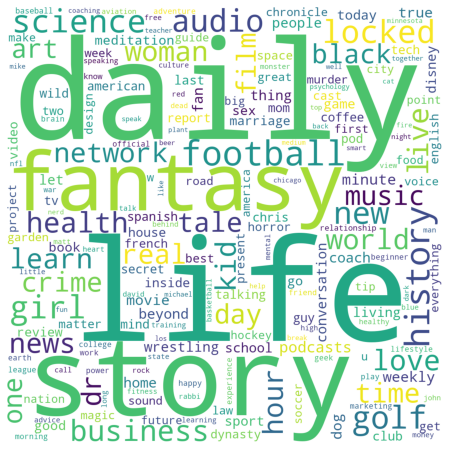

In [29]:
#list of all words in podcast names
all_words_names = df['name_tok'].sum()
counted_words_names = collections.Counter(all_words_names)
counted_words_names.most_common(50)

#make a wordcloud of most common words in podcast titles
from wordcloud import WordCloud
titles_wordcloud = WordCloud(width = 1200, height = 1200,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate_from_frequencies(counted_words_names)
plt.figure(figsize=(8,8))
plt.imshow(titles_wordcloud)
plt.axis("off")
plt.show()

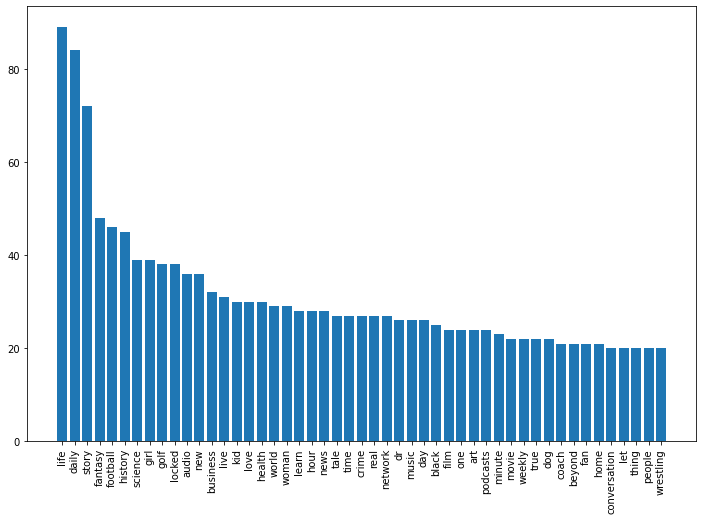

In [30]:
#plot the most common words
#get 100 most common words
mc_words_names = counted_words_names.most_common(50)
#convert to a dict
dict_words_names = dict(mc_words_names)
dict_words_names.pop('')
#make countplot
plt.figure(figsize = (12,8))
plt.bar(dict_words_names.keys(), dict_words_names.values())
plt.xticks(rotation=90)
plt.show()

## Exploring the genres

In [31]:
#check for empty values in the genres
df[df.genres == ""]

Empty DataFrame
Columns: [podcast_id, name, genres, author, description, content_rating, avg_rating, num_ratings, num_ratings_1star, num_ratings_2star, num_ratings_3star, num_ratings_4star, num_ratings_5star, episode_names, episode_descriptions, episode_durations, episode_dates, num_episodes_sample, review_ratings, review_titles, reviews, review_dates, num_reviews_sample, description_lang, name_clean, name_tok]
Index: []

In [32]:
#print a selection of genres
df.genres[:10]

0    ['Personal Journals', 'Podcasts', 'Society & C...
1    ['History', 'Podcasts', 'Religion & Spirituali...
2                  ['Aviation', 'Podcasts', 'Leisure']
3      ['Philosophy', 'Podcasts', 'Society & Culture']
4                     ['Health & Fitness', 'Podcasts']
5      ['Philosophy', 'Podcasts', 'Society & Culture']
6    ['Music Interviews', 'Podcasts', 'Music', 'Mus...
7     ['Food', 'Podcasts', 'Arts', 'Health & Fitness']
8    ['Music History', 'Podcasts', 'Music', 'Music ...
9       ['Society & Culture', 'Podcasts', 'Education']
Name: genres, dtype: object

In [33]:
#get list of all genres
def make_list_column(column):
    import re
    master_list =[]
    for row in column:
        row_list = row.split(',')
        for word in row_list:
            word = word.replace("'", "")
            word = word.replace("[", "")
            word = word.replace("]", "")
            word = word.strip()
            master_list.append(word)
    return master_list

In [34]:
#apply the function to our list of genres
genre_list = make_list_column(df.genres)

In [35]:
#count up the genres
counted_genres = collections.Counter(genre_list)

In [36]:
df_genres = pd.DataFrame.from_dict(counted_genres, orient='index').reset_index()
df_genres.columns = ['Genres', 'Number']
pd.set_option('display.max_rows', None)
df_genres.sort_values('Number', ascending = False)

Genres  Number
1                   Podcasts    4695
17                    Sports     692
2          Society & Culture     611
27                      News     557
8           Health & Fitness     513
15                 Education     508
6                    Leisure     457
39                  Business     453
13                      Arts     438
4    Religion & Spirituality     374
23                 TV & Film     366
63                   Science     330
20                    Comedy     310
57             Kids & Family     267
10                     Music     225
36          Self-Improvement     181
31                   Fiction     164
35               Sports News     130
66                Technology     127
54                   Hobbies     126
42          Entrepreneurship     118
3                    History     111
79                  Medicine     104
61              Christianity     102
40                   Careers     102
78             Mental Health     101
19           Performing Arts     100
0          Personal Journals      99
25        Alternative Health      98
34              Spirituality      97
38                    How To      97
85                   Fitness      95
55              Film Reviews      95
16                  Football      95
43                True Crime      93
72                  Politics      89
97                Government      85
24                 Nutrition      84
51                     Games      84
88                   Courses      84
7                 Philosophy      84
26           News Commentary      83
58           Places & Travel      83
91               After Shows      82
62           Social Sciences      80
95                TV Reviews      79
28               Documentary      79
101              Visual Arts      79
41                 Marketing      78
64                Management      77
11          Music Commentary      77
75             Relationships      76
69             Business News      76
9           Music Interviews      75
52        Entertainment News      75
76          Natural Sciences      74
12                      Food      72
21         Comedy Interviews      72
37                      Golf      71
32                     Drama      71
99                     Books      71
29                 Wrestling      69
87            Fantasy Sports      69
14             Music History      69
93           Science Fiction      67
30                 Sexuality      67
82                 Tech News      66
80                    Design      64
68                 Parenting      64
84                 Investing      63
53                Wilderness      62
18                Basketball      61
46                  Stand-Up      61
74                    Hockey      60
50               Video Games      60
103            Home & Garden      60
22              Film History      59
90                Non-Profit      59
56        Education for Kids      58
83                  Baseball      57
48                Automotive      56
89            Pets & Animals      56
98                    Improv      55
77                  Religion      55
86           Film Interviews      55
59         Language Learning      54
92                   Judaism      54
47                    Soccer      52
67             Life Sciences      51
100                   Nature      51
94            Comedy Fiction      48
73                Daily News      48
65                   Running      48
104         Fashion & Beauty      47
5                   Aviation      45
49                  Buddhism      45
81          Stories for Kids      45
60         Animation & Manga      33
44                     Islam      30
33                  Hinduism      28
71            Earth Sciences      27
70                    Crafts      20
106                   Tennis      10
96                     Rugby       9
110                Astronomy       9
45                   Cricket       8
109               Volleyball       8
107                  Physi

In [37]:
df_genres.shape

(111, 2)

We can distinguish the following broad genres:
* Sports: includes Sports, Sports News, Football, Basketball, Fantasy Sports, Running, Hockey, Baseball, Soccer, Wrestling, Golf, Tennis, Rugby, Swimming, Cricket, Volleyball,
* News & Current affairs: includes News, Politics, Government, News Commentary, Daily News
* Education: includes Education, Courses, Language Learning, How To
* Health, Fitness: includes Health and Fitness, Mental Health, Alternative Health, Fitness, Medicine, Nutrition
* Lifestyle & Leisure: Food, Fashion & Beauty, Home & Garden, Relationships, Parenting, Places & Travel, Sexuality, Personal Journals, Leisure, Hobbies, Crafts, Self-Improvement
* Business and Career includes: Business, Entrepreneurship, Marketing, Business News, Careers, Management, Investing, Non-Profit
* Art & Literature: includes Arts, Music, Fiction, Performing Arts, Music Commentary, Drama, Books, Music Interviews, Visual Arts, Music History, Science Fiction
* Religion & Spirituality: includes Religion & Spirituality, Spirituality, Christianity, Religion, Judaism, Buddhism, Islam, Hinduism
* TV & Film: includes TV & Film, Film Reviews, TV Reviews, Film Interviews, Film History, After Shows, Animation & Manga
* Comedy: includes Comedy, Comedy Interviews, Improv, Comedy Fiction, Stand-Up
* Science & Technology: Includes Science, Technology, Natural Sciences, Tech News, Life Sciences, Earth Sciences, Astronomy, Physics, Chemistry, Mathematics, Design
* Nature: Nature, Wilderness, Pets & Animals
* Kids: includes Kids & family, Education for Kids, Stories for Kids
* History & Philosophy: History, Philosophy, Social Sciences
* Games: includes Games, Video Games
* Documentary & True Crime: includes Documentary, True Crime
* Vehicles: includes Aviation, Automotive

We exclude from this list 2 genres that are too broad to be meaningful: "Pocasts" and "Society & Culture".


In [38]:
#define a function which determines the main genres of a podcast
def main_genre(genres):
    genre_scores = {'sports_score': 0, 'news_score':0, 'education_score':0, 'health_score':0, 'lifestyle_score':0,
                    'vehicles_score' : 0, 'business_score':0, 'art_score':0, 'religion_score':0, 'tv_score':0,
                    'comedy_score':0, 'science_score':0, 'nature_score':0, 'kids_score':0, 'history_score':0,
                    'games_score':0, 'documentary_score':0, 'num_genres':0}
    genre_list = genres.split(',')
    for genre in genre_list:
            genre = genre.replace("'", "")
            genre = genre.replace("[", "")
            genre = genre.replace("]", "")
            genre = genre.strip()
            if genre in ['Sports', 'Sports News', 'Football', 'Basketball', 'Fantasy Sports', 'Running',
            'Hockey', 'Baseball', 'Soccer', 'Wrestling', 'Golf', 'Tennis', 'Rugby', 'Swimming',
            'Cricket', 'Volleyball']:
                genre_scores['sports_score'] +=1
            if genre in ['News', 'Politics', 'Government', 'News Commentary', 'Daily News']:
                genre_scores['news_score'] +=1
            if genre in ['Education', 'Courses', 'Language Learning', 'How To']:
                genre_scores['education_score'] +=1
            if genre in ['Health & Fitness', 'Mental Health', 'Alternative Health', 'Fitness', 'Medicine',
                         'Nutrition']:
                genre_scores['health_score'] +=1
            if genre in ['Food', 'Fashion & Beauty', 'Home & Garden', 'Relationships', 'Parenting',
                         'Places & Travel', 'Sexuality', 'Personal Journals', 'Leisure', 'Hobbies',
                         'Crafts', 'Self-Improvement', 'Aviation', 'Automotive']:
                genre_scores['lifestyle_score'] +=1
            if genre in ['Aviation', 'Automotive']:
                genre_scores['vehicles_score'] +=1
            if genre in ['Business', 'Entrepreneurship', 'Marketing', 'Business News', 'Careers', 'Management',
                         'Investing', 'Non-Profit']:
                genre_scores['business_score'] +=1
            if genre in ['Arts', 'Music', 'Fiction', 'Performing Arts', 'Music Commentary', 'Drama', 'Books',
                         'Music Interviews', 'Visual Arts', 'Music History', 'Science Fiction']:
                genre_scores['art_score'] += 1
            if genre in ['Religion & Spirituality', 'Spirituality', 'Christianity', 'Religion', 'Judaism',
                         'Buddhism', 'Islam', 'Hinduism']:
                genre_scores['religion_score'] +=1
            if genre in ['TV & Film', 'Film Reviews', 'TV Reviews', 'Film Interviews', 'Film History', 'After Shows',
                         'Animation & Manga', 'Entertainment News']:
                genre_scores['tv_score'] +=1
            if genre in ['Comedy', 'Comedy Interviews', 'Improv', 'Comedy Fiction', 'Stand-Up']:
                genre_scores['comedy_score'] +=1
            if genre in ['Science', 'Technology', 'Natural Sciences', 'Tech News', 'Life Sciences', 'Earth Sciences',
                         'Astronomy', 'Physics', 'Chemistry', 'Mathematics', 'Design']:
                genre_scores['science_score'] +=1
            if genre in ['Nature', 'Wilderness', 'Pets & Animals']:
                genre_scores['nature_score'] +=1
            if genre in ['Kids & Family', 'Education for Kids', 'Stories for Kids']:
                genre_scores['kids_score'] += 1
            if genre in ['History', 'Philosophy', 'Social Sciences']:
                genre_scores['history_score'] += 1
            if genre in ['Games', 'Video Games']:
                genre_scores['games_score'] += 1
            if genre in ['Documentary', 'True Crime']:
                genre_scores['documentary_score'] += 1
            if genre not in ['Podcasts', 'Society & Culture']:
                genre_scores['num_genres'] += 1
    return genre_scores

In [39]:
#apply the function to our dataframe
df['genre_scores'] = df.genres.apply(lambda x: main_genre(x))

In [40]:
pd.set_option('display.max_rows', 20)

In [41]:
#make separate columns for each value in the genre_scores column
df = pd.concat([df, df.genre_scores.apply(pd.Series)], axis=1)

In [42]:
#check that everything worked
df[(df.sports_score + df.news_score + df.education_score + df.health_score +
       df.lifestyle_score + df.vehicles_score + df.business_score + df.art_score + df.religion_score +
       df.tv_score + df.comedy_score + df.science_score + df.nature_score +
       df.kids_score + df.history_score + df.games_score + df.documentary_score) != df.num_genres]

podcast_id                                               name   
2     1450115847           Soaring the sky a glider pilot's Podcast  \
32    1511179609                                           RennCast   
50     356994764                                           Hangar49   
61    1359262274                                    Learning to fly   
81     268977062             Student Pilot Journal Aviation Podcast   
...          ...                                                ...   
4692   988440891  Overland Roundtable - Overland Travel in a Jee...   
4700   977500599                        The Power and Speed Podcast   
4868  1437758855                         Cirrus Aircraft Flight Fix   
4910  1460438143                          Wheeling Wine And Whiskey   
4962  1460544260                     AirTime — a Sky Review podcast   

                                                 genres   
2                   ['Aviation', 'Podcasts', 'Leisure']  \
32                ['Automotive', 'Podcasts', 'Leisure']   
50                  ['Aviation', 'Podcasts', 'Leisure']   
61                  ['Aviation', 'Podcasts', 'Leisure']   
81                  ['Aviation', 'Podcasts', 'Leisure']   
...                                                 ...   
4692              ['Automotive', 'Podcasts', 'Leisure']   
4700    ['Automotive', 'Podcasts', 'Leisure', 'Sports']   
4868                ['Aviation', 'Podcasts', 'Leisure']   
4910              ['Automotive', 'Podcasts', 'Leisure']   
4962  ['Aviation', 'Podcasts', 'Leisure', 'Education...   

                         author   
2                  Chuck Fulton  \
32               Bobby Mitchell   
50                     Hangar49   
61                      Kpinzou   
81                 Greg Summers   
...                         ...   
4692            The 4x4 Podcast   
4700         Readington Digital   
4868            Cirrus Aircraft   
4910  Wheeling Wine And Whiskey   
4962                  skyreview   

                                            description content_rating   
2     An Aviation podcast about soaring with sailpla...          clean  \
32    RennCast is a show for those that desire to le...          clean   
50    Jim Leighty, Al Gilson, and Tony Roberts talk ...          clean   
61    I'm a general aviation enthusiast who longed t...          clean   
81    An aviation video podcast documenting flight t...          clean   
...                                                 ...            ...   
4692  The Overland Roundtable is a panel discussion ...          clean   
4700  Power and Speed.  The two single most importan...       explicit   
4868  At Cirrus Aircraft, we believe all aviators sh...          clean   
4910  Listen to Chris and Jason on our new podcast w...       explicit   
4962  In the course of obtaining my pilot license, I...          clean   

      avg_rating  num_ratings  num_ratings_1star  num_ratings_2star   
2            4.6           17                  0                  1  \
32           5.0            2                  0                  0   
50           4.9           16                  0                  0   
61           5.0            3                  0                  0   
81           4.2           33                  2                  1   
...          ...          ...                ...                ...   
4692         4.5           41                  3                  1   
4700         4.7          150                  6                  2   
4868         5.0            4                  0                  0   
4910         5.0           94                  0                  0   
4962         0.0            0                  0                  0   

      num_ratings_3star  num_ratings_4star  num_ratings_5star   
2                     1                  1                 14  \
32                    0                  0                  2   
50                    0                  1                 15   
61                   

<AxesSubplot:xlabel='num_genres', ylabel='count'>

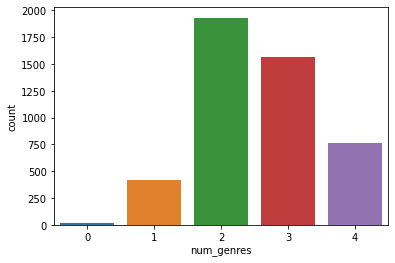

In [43]:
#how many genres in our podcasts
sns.countplot(df.num_genres)

In [44]:
#convert the genre scores columns to binaries if a genre is present in the podcast or not
df.loc[df['sports_score'] > 0, 'sports_genre'] = 1
df.loc[df['sports_score'] == 0, 'sports_genre'] = 0
df.loc[df['news_score'] > 0, 'news_genre'] = 1
df.loc[df['news_score'] == 0, 'news_genre'] = 0
df.loc[df['education_score'] > 0, 'education_genre'] = 1
df.loc[df['education_score'] == 0, 'education_genre'] = 0
df.loc[df['health_score'] > 0, 'health_genre'] = 1
df.loc[df['health_score'] == 0, 'health_genre'] = 0
df.loc[df['lifestyle_score'] > 0, 'lifestyle_genre'] = 1
df.loc[df['lifestyle_score'] == 0, 'lifestyle_genre'] = 0
df.loc[df['vehicles_score'] > 0, 'vehicles_genre'] = 1
df.loc[df['vehicles_score'] == 0, 'vehicles_genre'] = 0
df.loc[df['business_score'] > 0, 'business_genre'] = 1
df.loc[df['business_score'] == 0, 'business_genre'] = 0
df.loc[df['art_score'] > 0, 'art_genre'] = 1
df.loc[df['art_score'] == 0, 'art_genre'] = 0
df.loc[df['religion_score'] > 0, 'religion_genre'] = 1
df.loc[df['religion_score'] == 0, 'religion_genre'] = 0
df.loc[df['tv_score'] > 0, 'tv_genre'] = 1
df.loc[df['tv_score'] == 0, 'tv_genre'] = 0
df.loc[df['comedy_score'] > 0, 'comedy_genre'] = 1
df.loc[df['comedy_score'] == 0, 'comedy_genre'] = 0
df.loc[df['science_score'] > 0, 'science_genre'] = 1
df.loc[df['science_score'] == 0, 'science_genre'] = 0
df.loc[df['nature_score'] > 0, 'nature_genre'] = 1
df.loc[df['nature_score'] == 0, 'nature_genre'] = 0
df.loc[df['kids_score'] > 0, 'kids_genre'] = 1
df.loc[df['kids_score'] == 0, 'kids_genre'] = 0
df.loc[df['history_score'] > 0, 'history_genre'] = 1
df.loc[df['history_score'] == 0, 'history_genre'] = 0
df.loc[df['games_score'] > 0, 'games_genre'] = 1
df.loc[df['games_score'] == 0, 'games_genre'] = 0
df.loc[df['documentary_score'] > 0, 'documentary_genre'] = 1
df.loc[df['documentary_score'] == 0, 'documentary_genre'] = 0

In [45]:
#convert to integers
genre_cols = ['sports_genre', 'news_genre', 'education_genre', 'health_genre', 'lifestyle_genre','vehicles_genre',
              'business_genre', 'art_genre', 'religion_genre', 'tv_genre', 'comedy_genre','science_genre',
              'nature_genre', 'kids_genre', 'history_genre', 'games_genre', 'documentary_genre']

for col in genre_cols:
    df[col] = df[col].apply(int)

In [46]:
len(genre_cols)

17

###  Number and percent of podcasts in each genre

In [47]:
#genre_cols
len(genre_cols)

17

In [48]:
#list of our main genres
genre_cols = ['sports_genre', 'news_genre', 'education_genre', 'health_genre', 'lifestyle_genre','vehicles_genre',
              'business_genre', 'art_genre', 'religion_genre', 'tv_genre', 'comedy_genre','science_genre',
              'nature_genre', 'kids_genre', 'history_genre', 'games_genre', 'documentary_genre']
#get average of podcasts in each genre
rows = [[genre, int(df[genre].sum()), round(df[genre].mean(), 2)] for genre in genre_cols]
average_genres_df = pd.DataFrame(rows, columns = ['Genre','Number','Percent'])
average_genres_df.sort_values('Number', ascending = False)

Genre  Number  Percent
4     lifestyle_genre    1057     0.23
7           art_genre     776     0.17
0        sports_genre     733     0.16
1          news_genre     620     0.13
11      science_genre     540     0.12
3        health_genre     513     0.11
2     education_genre     508     0.11
6      business_genre     507     0.11
9            tv_genre     449     0.10
8      religion_genre     374     0.08
10       comedy_genre     349     0.07
13         kids_genre     267     0.06
14      history_genre     266     0.06
12       nature_genre     163     0.03
16  documentary_genre     161     0.03
15        games_genre     133     0.03
5      vehicles_genre     101     0.02

### Podcast names and genres

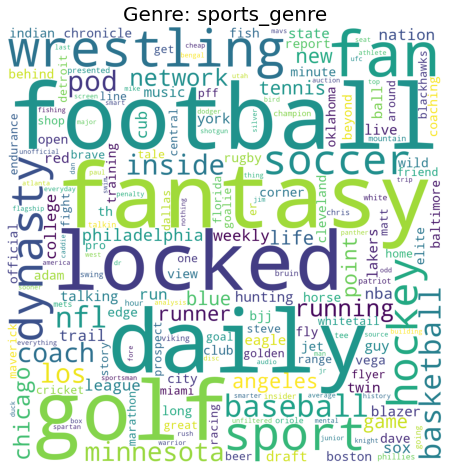

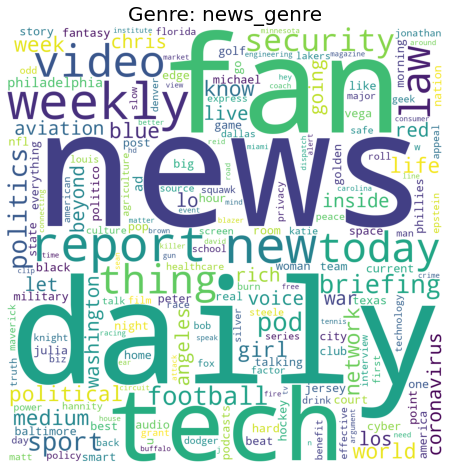

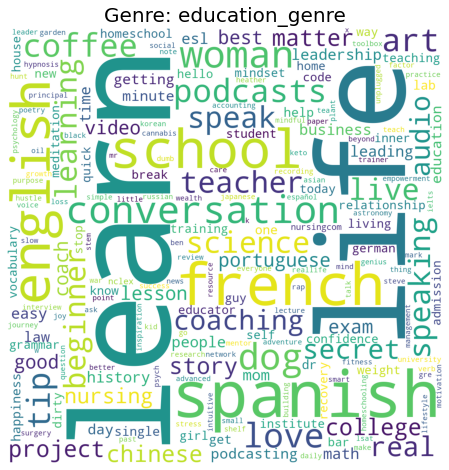

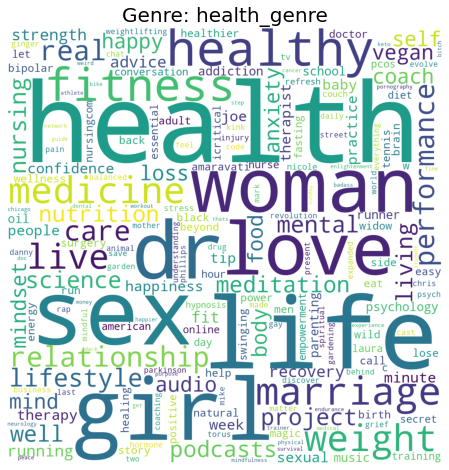

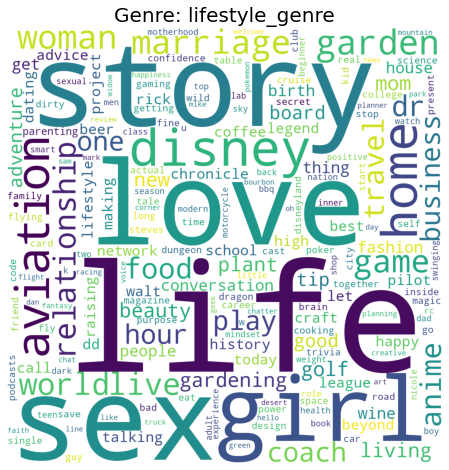

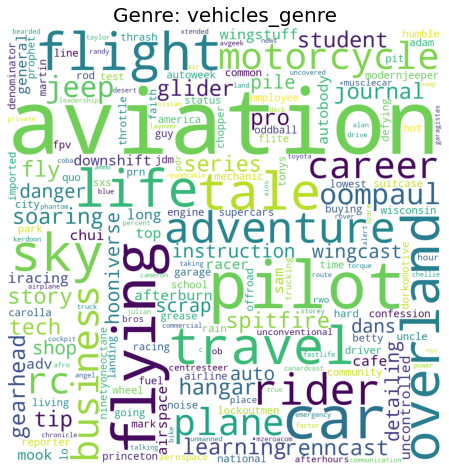

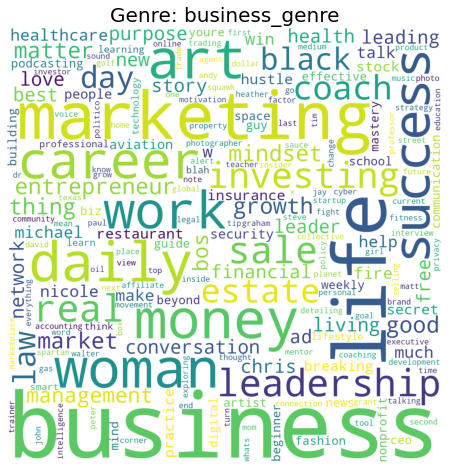

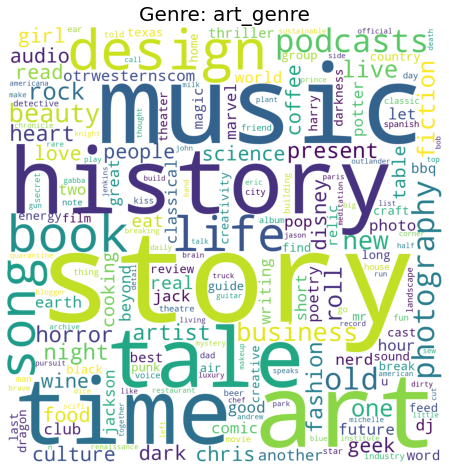

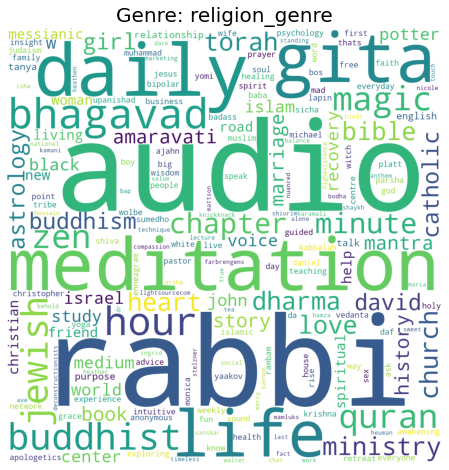

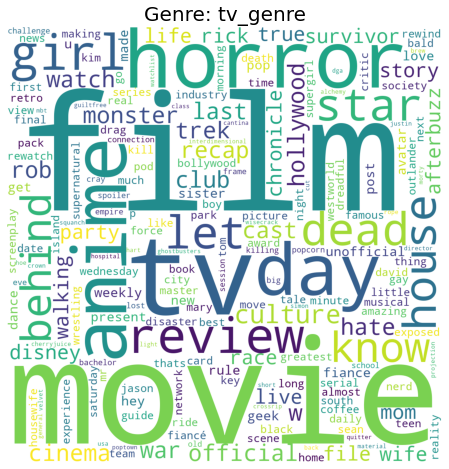

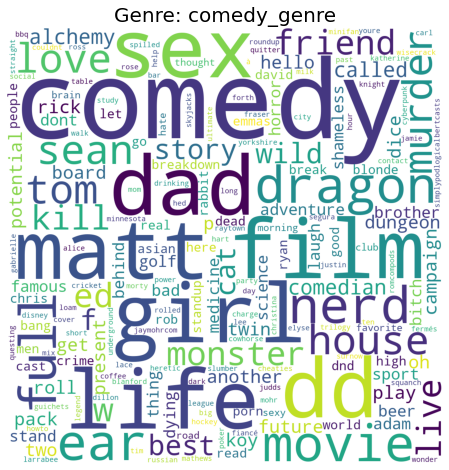

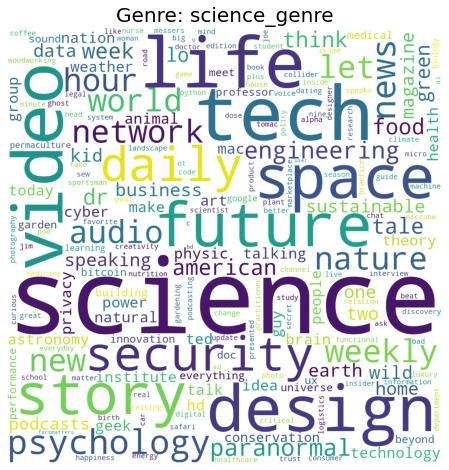

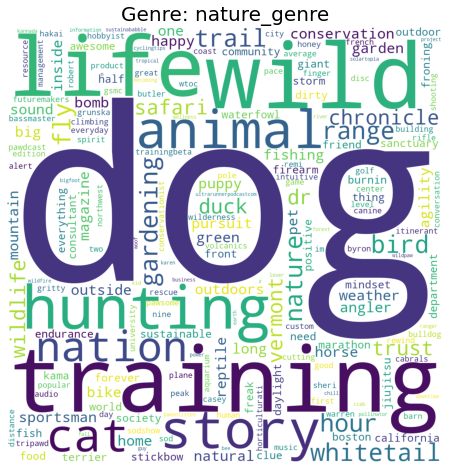

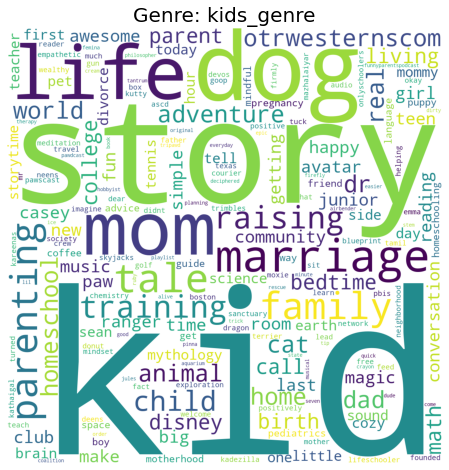

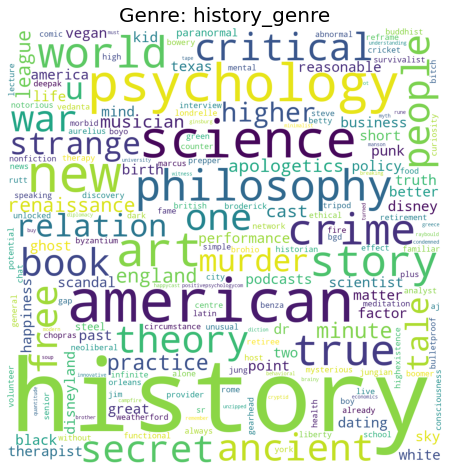

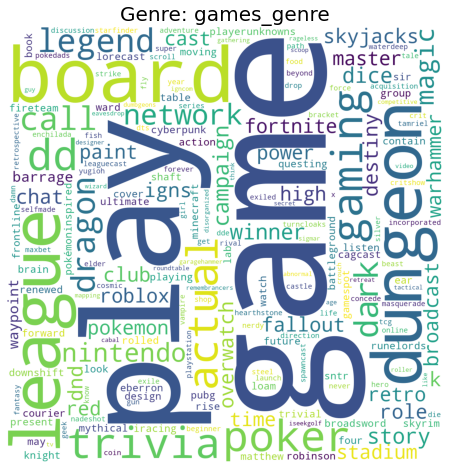

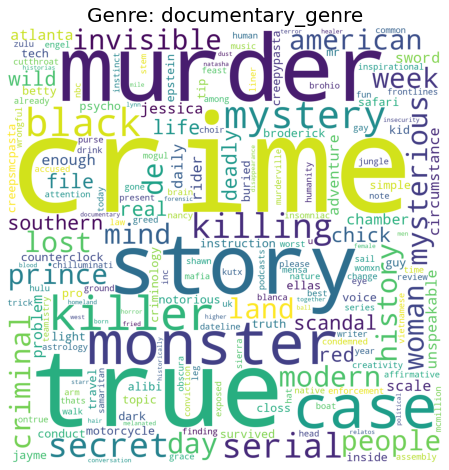

In [49]:
#how do the titles vary by genre?
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['podcast', 'show', 'radio', 'talk'])
for genre in genre_cols:
    #list of all words in podcast names
    all_words_names = df.loc[df[genre] == 1, ['name_tok']].sum(axis = 1)
    all_words_names = all_words_names.sum()
    counted_words_names = collections.Counter(all_words_names)
    #make a wordcloud of most common words in podcast titles
    from wordcloud import WordCloud
    titles_wordcloud = WordCloud(width = 1200, height = 1200,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate_from_frequencies(counted_words_names)
    plt.figure(figsize=(8,8))
    plt.imshow(titles_wordcloud)
    plt.title('Genre: {}'.format(genre), fontsize = 20)
    plt.axis("off")
    plt.savefig('{}.png'.format(genre))
    plt.show()

## Exploring ratings

### Average rating

In [50]:
#statistics for average rating
df.avg_rating.describe()

count    4695.000000
mean        4.558892
std         0.932702
min         0.000000
25%         4.600000
50%         4.800000
75%         5.000000
max         5.000000
Name: avg_rating, dtype: float64

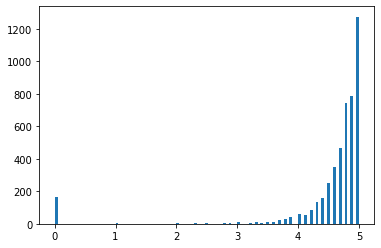

In [51]:
# distribution of ratings
plt.hist(df.avg_rating, bins = 'auto');

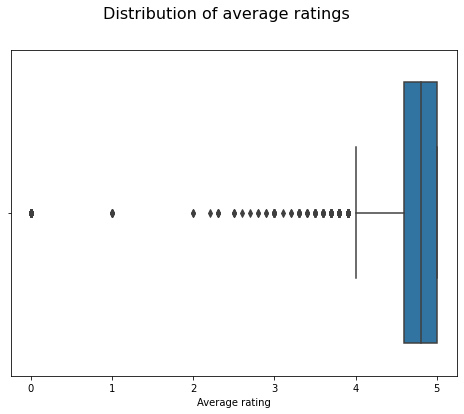

In [52]:
#boxplot of average rating
plt.figure(figsize = (8,6));
sns.boxplot(x = df.avg_rating);
plt.suptitle('Distribution of average ratings', fontsize=16);
plt.xlabel('Average rating')
plt.savefig('Average_rating.jpg')

In [53]:
#how many podcasts have the maximum rating?
df[df.avg_rating == 5.0].shape[0]

1274

In [54]:
#how many podcasts have rating = 0
df[df.avg_rating == 0.0].shape[0]

162

In [55]:
#explore some of the podcasts with rating 0
df[df.avg_rating == 0.0].head(5)

podcast_id                                 name   
13  1508618603                  By Projection Light  \
29  1448134424                   History of Cricket   
30  1504874143                    À Guichets Fermés   
35  1504641401        Yorkshire Cricket: Covers Off   
72  1513843162  Isha Upanishad – Arsha Bodha Center   

                                               genres              author   
13          ['Film History', 'Podcasts', 'TV & Film']     Gabriela Masson  \
29       ['Cricket', 'Podcasts', 'Sports', 'History']    historyofcricket   
30                 ['Stand-Up', 'Podcasts', 'Comedy']        What The Fun   
35        ['Cricket', 'Podcasts', 'Sports', 'Comedy']       Yorkshire CCC   
72  ['Hinduism', 'Podcasts', 'Religion & Spiritual...  Swami Tadatmananda   

                                          description content_rating   
13  A podcast in which the cinema of the 1930s to ...          clean  \
29  This podcast is the History of Cricket, starti...          clean   
30  Le Podcast des humoristes sans public.  50' et...          clean   
35  For lovers of cricket, Yorkshire and banter, o...          clean   
72  Teaching of Spiritual Teachings of Ancient Ind...          clean   

    avg_rating  num_ratings  num_ratings_1star  num_ratings_2star   
13         0.0            0                  0                  0  \
29         0.0            0                  0                  0   
30         0.0            0                  0                  0   
35         0.0            0                  0                  0   
72         0.0            0                  0                  0   

    num_ratings_3star  num_ratings_4star  num_ratings_5star   
13                  0                  0                  0  \
29                  0                  0                  0   
30                  0                  0                  0   
35                  0                  0                  0   
72                  0                  0                  0   

                                        episode_names   
13  ['2. Audacious Audrey', 'Mini Trailer for Auda...  \
29  ['1937 - Womens series - Australia raise the b...   
30  ['Episode 13 - Sum', 'Episode 12 - François Gu...   
35  ['#11 - Will-ey be any good?!', '#10 - Brez in...   
72  ['Isha Upanishad Mantra 15-18', 'Isha Upanisha...   

                                 episode_descriptions   
13  ['This week, Gabriela talks about not one but ...  \
29  ['Peggy Antonio, a girl from the wrong end of ...   
30  ["Dans ce treizième épisode, Raph et Rudy reço...   
35  ['On the day that would have been the Game of ...   
72  ['The post Isha Upanishad Mantra 15-18 appeare...   

                                    episode_durations   
13                   [2678000, 79000, 4607000, 61000]  \
29  [1132000, 1683000, 1527000, 1699000, 1411000, ...   
30  [3067000, 3024000, 3008000, 3132000, 2957000, ...   
35  [2594000, 2881000, 3206000, 3207000, 2426000, ...   
72  [3777000, 3835000, 3821000, 4136000, 4002000, ...   

                                        episode_dates  num_episodes_sample   
13  ['2020-05-16T06:15:00.000Z', '2020-05-09T06:10...                    4  \
29  ['2020-06-08T06:19:45.000Z', '2020-05-31T18:47...                    6   
30  ['2020-06-07T11:00:00.000Z', '2020-05-31T11:00...                    6   
35  ['2020-06-04T08:00:00.000Z', '2020-06-01T07:00...                    6   
72  ['2011-11-15T14:00:01.000Z', '2011-11-08T14:00...                    6   

   review_ratings review_titles reviews review_dates  num_reviews_sample   
13             []            []      []           []                   0  \
29             []            []      []           []                   0   
30             []            []      []           []                   0   
35             []            []      []           []                   0   
72             []            []      []           []                   0   

   description_lang         

### Number of ratings

In [56]:
#statistics for the number of ratings
df.num_ratings.describe()

count      4695.000000
mean        550.039617
std        3118.187905
min           0.000000
25%          11.000000
50%          49.000000
75%         230.000000
max      121651.000000
Name: num_ratings, dtype: float64

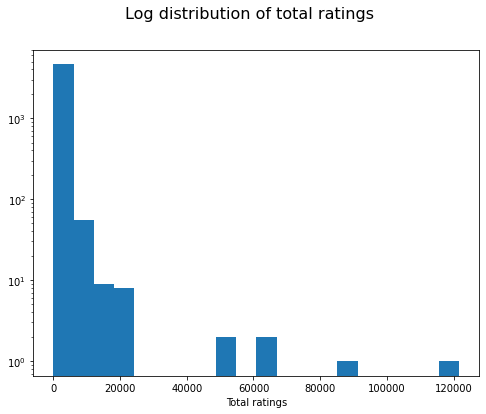

In [57]:
#distribution of the number of ratings
plt.figure(figsize = (8,6));
plt.hist(df.num_ratings, bins = 20);
plt.yscale('log')
plt.suptitle('Log distribution of total ratings', fontsize=16);
plt.xlabel('Total ratings')
plt.savefig('Log_total_rating.jpg')

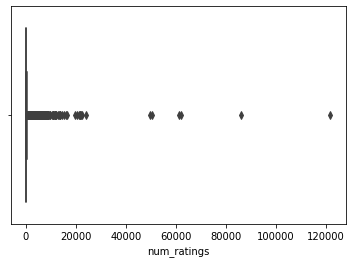

In [58]:
#boxplot of number of ratings
sns.boxplot(x= df.num_ratings);

In [59]:
#how many podcasts have 0 ratings?
df[df.num_ratings == 0].shape[0]

162

In [60]:
#top 10 podcasts with most ratings
df.sort_values('num_ratings', ascending = False).head(20)[['name', 'num_ratings']]

name  num_ratings
4681  My Favorite Murder with Karen Kilgariff and Ge...       121651
925                                The Ben Shapiro Show        85824
565                                           The Daily        61806
4598             VIEWS with David Dobrik and Jason Nash        61006
3456                                    Up and Vanished        50491
2142                                Revisionist History        49466
4562                             Monday Morning Podcast        24045
4309                  Congratulations with Chris D'Elia        22455
2870                              Welcome to Night Vale        21918
4963                                 Freakonomics Radio        21646
4403                               The Dave Ramsey Show        21542
4895                                           The Read        21178
3391                                      99% Invisible        20407
27                                      Atlanta Monster        19510
1679                 Off The Vine with Kaitlyn Bristowe        16312
672   Your Mom's House with Christina P. and Tom Segura        15854
4031                            Someone Knows Something        15061
2902                                           Red Ball        14476
2129                            And That's Why We Drink        13782
1597                        Deeper with The Dolan Twins        13669

In [61]:
#podcasts with most 1 star ratings
df.sort_values('num_ratings_1star', ascending = False).head(20)[['name', 'num_ratings_1star']]

name  num_ratings_1star
925                                The Ben Shapiro Show               7182
4681  My Favorite Murder with Karen Kilgariff and Ge...               5086
565                                           The Daily               3116
3456                                    Up and Vanished               2687
818          The Ben and Ashley I Almost Famous Podcast               2088
27                                      Atlanta Monster               1604
2142                                Revisionist History               1518
3563  Bachelor Happy Hour – The Official Bachelor Po...               1291
1679                 Off The Vine with Kaitlyn Bristowe               1252
4754                              The Sean Hannity Show               1141
364                             Straight Up with Stassi               1060
2902                                           Red Ball               1022
1604                             Heads of Sierra Blanca                860
4963                                 Freakonomics Radio                855
4403                               The Dave Ramsey Show                852
4891                                     Gals on the Go                844
4894  Little Girl Lost: The Case of Erica Parsons | ...                805
2006                        The Herd with Colin Cowherd                794
4598             VIEWS with David Dobrik and Jason Nash                793
3121               Unsolved Murders: True Crime Stories                746

In [62]:
#podcasts with most 5 star ratings
df.sort_values('num_ratings_5star', ascending = False).head(20)[['name', 'num_ratings_5star']]

name  num_ratings_5star
4681  My Favorite Murder with Karen Kilgariff and Ge...             107482
925                                The Ben Shapiro Show              74268
4598             VIEWS with David Dobrik and Jason Nash              58152
565                                           The Daily              49606
2142                                Revisionist History              42447
3456                                    Up and Vanished              37536
4562                             Monday Morning Podcast              22038
4309                  Congratulations with Chris D'Elia              21582
2870                              Welcome to Night Vale              20323
4895                                           The Read              20018
3391                                      99% Invisible              18458
4403                               The Dave Ramsey Show              17816
4963                                 Freakonomics Radio              16485
672   Your Mom's House with Christina P. and Tom Segura              14709
1679                 Off The Vine with Kaitlyn Bristowe              13441
1597                        Deeper with The Dolan Twins              13395
2129                            And That's Why We Drink              12558
27                                      Atlanta Monster              12454
4465                  Juicy Scoop with Heather McDonald              12431
2902                                           Red Ball              11926

### Total positive ratings

We define "positive ratings" as 4 or 5 stars

In [63]:
df['total_pos_ratings'] = df['num_ratings_4star'] + df['num_ratings_5star']

In [64]:
#podcasts with most positive ratings
df.sort_values('total_pos_ratings', ascending = False).head(20)[['name', 'total_pos_ratings']]

name  total_pos_ratings
4681  My Favorite Murder with Karen Kilgariff and Ge...             111943
925                                The Ben Shapiro Show              76503
4598             VIEWS with David Dobrik and Jason Nash              59304
565                                           The Daily              54321
2142                                Revisionist History              45374
3456                                    Up and Vanished              43022
4562                             Monday Morning Podcast              22818
4309                  Congratulations with Chris D'Elia              21915
2870                              Welcome to Night Vale              21036
4895                                           The Read              20543
3391                                      99% Invisible              19436
4403                               The Dave Ramsey Show              19348
4963                                 Freakonomics Radio              19095
27                                      Atlanta Monster              15403
672   Your Mom's House with Christina P. and Tom Segura              15115
1679                 Off The Vine with Kaitlyn Bristowe              14218
1597                        Deeper with The Dolan Twins              13521
4031                            Someone Knows Something              13483
2129                            And That's Why We Drink              12968
4465                  Juicy Scoop with Heather McDonald              12734

In [65]:
df.total_pos_ratings.describe()

count      4695.00000
mean        503.20426
std        2846.57711
min           0.00000
25%          10.00000
50%          45.00000
75%         212.00000
max      111943.00000
Name: total_pos_ratings, dtype: float64

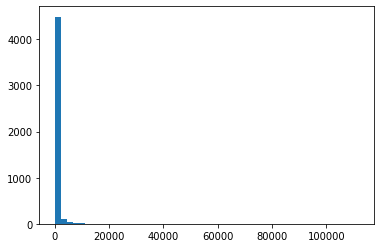

In [66]:
#distribution of positive ratings
plt.hist(df.total_pos_ratings, bins = 50);

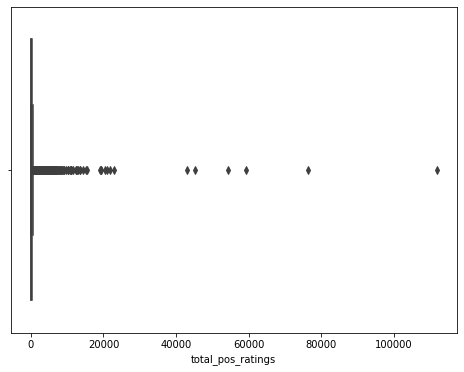

In [67]:
#boxplot
plt.figure(figsize = (8,6))
sns.boxplot(df.total_pos_ratings);

In [68]:
df[df.total_pos_ratings > 10000].shape[0]

32

### Log of positive ratings

In [69]:
#take the log of positive ratings
df['log_pos_ratings'] = np.log10(df['total_pos_ratings'] +1)

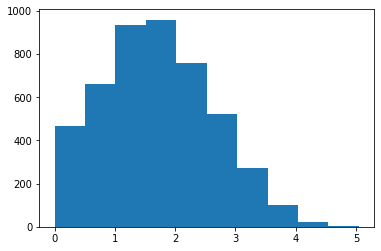

In [70]:
#plot the histogram
plt.hist(df.log_pos_ratings);

In [71]:
df.log_pos_ratings.describe()

count    4695.000000
mean        1.715024
std         0.908410
min         0.000000
25%         1.041393
50%         1.662758
75%         2.328380
max         5.049001
Name: log_pos_ratings, dtype: float64

### Ratings categories

We will use this as the basis to create positive ratings categories: very low, low, medium, high and very high.
* 0 - 1 : Low
* 1 - 2: Medium
* 2-4: High
* 4+: Very high

In [72]:
df.loc[df.log_pos_ratings <= 1, 'ratings_cat'] = 'low'
df.loc[((df.log_pos_ratings >1) & (df.log_pos_ratings <= 2)), 'ratings_cat'] = 'medium'
df.loc[((df.log_pos_ratings >2) & (df.log_pos_ratings <= 4)), 'ratings_cat'] = 'high'
df.loc[df.log_pos_ratings > 4, 'ratings_cat'] = 'very high'

In [73]:
df.ratings_cat.value_counts()

ratings_cat
medium       1861
high         1678
low          1124
very high      32
Name: count, dtype: int64

### Ratings 3 categories

In [74]:
df.loc[df.total_pos_ratings <= 100, 'ratings_categories'] = 'low'
df.loc[((df.total_pos_ratings >100) & (df.total_pos_ratings <= 5000)), 'ratings_categories'] = 'medium'
df.loc[df.total_pos_ratings > 5000, 'ratings_categories'] = 'high'

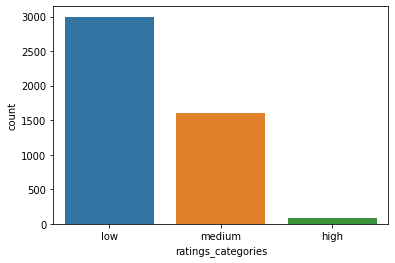

In [75]:
sns.countplot(df.ratings_categories);

In [76]:
df.ratings_categories.value_counts()

ratings_categories
low       2997
medium    1609
high        89
Name: count, dtype: int64

### Ratings 2 categories

In [77]:
df.loc[df.total_pos_ratings <= 1000, 'popularity_cat'] = 'low'
df.loc[df.total_pos_ratings > 1000, 'popularity_cat'] = 'high'

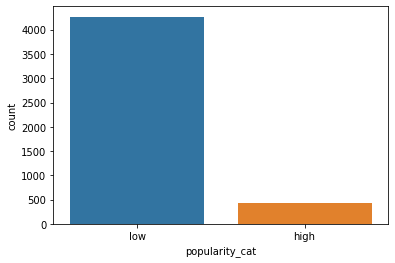

In [78]:
sns.countplot(df.popularity_cat);

### Total stars

In [79]:
#define a total stars given to the podcasts: number of ratings in each category * number of stars
df['total_stars'] = (df['num_ratings_1star'] + 2*df['num_ratings_2star'] + 3*df['num_ratings_3star'] +
4* df['num_ratings_4star'] + 5*df['num_ratings_5star'])
df.head()

podcast_id                                      name   
0  1446936288       The Coach's Wife Chronicles Podcast  \
1  1205327374                                 Not Alone   
2  1450115847  Soaring the sky a glider pilot's Podcast   
3  1404709155                                 Londrelle   
4   394384987                           NHS Couch to 5K   

                                              genres   
0  ['Personal Journals', 'Podcasts', 'Society & C...  \
1  ['History', 'Podcasts', 'Religion & Spirituali...   
2                ['Aviation', 'Podcasts', 'Leisure']   
3    ['Philosophy', 'Podcasts', 'Society & Culture']   
4                   ['Health & Fitness', 'Podcasts']   

                        author   
0  The Coach's Wife Chronicles  \
1                    Not Alone   
2                 Chuck Fulton   
3                    Londrelle   
4                  NHS Choices   

                                         description content_rating   
0  Get an in depth look into life as a Coach's wi...          clean  \
1  Not Alone is a weekly podcast covering all thi...          clean   
2  An Aviation podcast about soaring with sailpla...          clean   
3  A collection of love inspired talks with poet/...          clean   
4  This is a running plan designed to get complet...          clean   

   avg_rating  num_ratings  num_ratings_1star  num_ratings_2star   
0         5.0           34                  0                  0  \
1         4.6          705                 33                 13   
2         4.6           17                  0                  1   
3         5.0          140                  0                  0   
4         4.6          195                  7                  4   

   num_ratings_3star  num_ratings_4star  num_ratings_5star   
0                  0                  0                 34  \
1                 24                 42                593   
2                  1                  1                 14   
3                  1                  1                138   
4                 11                 23                150   

                                       episode_names   
0  ['The Wife Beside You....', 'The Great Divide'...  \
1  ['18: One Hundred Twenty-Six: Dulce Base I - T...   
2  ['A Dream To Soar', 'Auto Tows Aero Tows & Win...   
3  ['What To Do In These Times', 'Choose Happines...   
4  ['Couch to 5K - Week 1', 'Couch to 5K - Week 2...   

                                episode_descriptions   
0  ["Let's get real here and dive into some topic...  \
1  ["This week we're covering one of the most int...   
2  ["Our guest pilot originally from the West Mid...   
3                           ['', '', '', '', '', '']   
4  ['Couch to 5k is a running plan designed to ge...   

                                   episode_durations   
0  [1352000, 849000, 744000, 927000, 2144000, 145...  \
1  [5766000, 4057000, 4638000, 4764000, 3977000, ...   
2  [1844000, 2202000, 2185000, 2818000, 2250000, ...   
3   [250000, 651000, 617000, 792000, 213000, 575000]   
4                                                 []   

                                       episode_dates  num_episodes_sample   
0  ['2020-06-05T00:41:31.000Z', '2019-10-02T00:58...                    6  \
1  ['2020-06-06T00:38:12.000Z', '2020-04-30T22:09...                    6   
2  ['2020-06-03T00:00:00.000Z', '2020-05-26T22:00...                    6   
3  ['2020-03-21T03:03:54.000Z', '2020-03-10T05:55...                    6   
4  ['2012-10-25T19:00:00.000Z', '2012-10-25T18:50...                    6   

                   review_ratings   
0  [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]  \
1  [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]   
2           [5, 5, 5, 3, 5, 5, 5]   
3           [5, 5, 5, 5, 5, 5, 5]   
4  [5, 5, 5, 5, 5, 5, 5, 5, 4, 5]   

                                       review_titles   
0  ['Truth', 'Amen!!!', 'Truth!', 'Relatable, Fun...  \
1  ['Great podcast', 'Hiatus?', 'A Great Find', "...   
2  ['Great Podcast!', 'Interview

In [80]:
#podcasts with most stars
df.sort_values('total_stars', ascending = False).head(20)[['name', 'total_stars']]

name  total_stars
4681  My Favorite Murder with Karen Kilgariff and Ge...       572159
925                                The Ben Shapiro Show       392869
4598             VIEWS with David Dobrik and Jason Nash       298526
565                                           The Daily       281244
2142                                Revisionist History       232085
3456                                    Up and Vanished       224756
4562                             Monday Morning Podcast       115622
4309                  Congratulations with Chris D'Elia       110225
2870                              Welcome to Night Vale       106211
4895                                           The Read       103418
4403                               The Dave Ramsey Show        99579
3391                                      99% Invisible        98280
4963                                 Freakonomics Radio        98161
27                                      Atlanta Monster        82180
672   Your Mom's House with Christina P. and Tom Segura        76548
1679                 Off The Vine with Kaitlyn Bristowe        73724
4031                            Someone Knows Something        69148
1597                        Deeper with The Dolan Twins        67761
2129                            And That's Why We Drink        65982
2902                                           Red Ball        65348

### Total stars squared

Let's also calculate the number of stars "squared" to give a higher weighting to the podcasts that are rated with more stars.

In [81]:
df['total_stars_sq'] = (df['num_ratings_1star'] + 4*df['num_ratings_2star'] + 9*df['num_ratings_3star'] +
16* df['num_ratings_4star'] + 25*df['num_ratings_5star'])

In [82]:
#most popular podcasts by stars squared
df.sort_values('total_stars_sq', ascending = False).head(20)[['name', 'total_stars_sq']]

name  total_stars_sq
4681  My Favorite Murder with Karen Kilgariff and Ge...         2794875
925                                The Ben Shapiro Show         1913843
4598             VIEWS with David Dobrik and Jason Nash         1479396
565                                           The Daily         1348682
2142                                Revisionist History         1127201
3456                                    Up and Vanished         1062396
4562                             Monday Morning Podcast          568700
4309                  Congratulations with Chris D'Elia          547089
2870                              Welcome to Night Vale          523623
4895                                           The Read          511728
3391                                      99% Invisible          482240
4403                               The Dave Ramsey Show          480307
4963                                 Freakonomics Radio          466769
27                                      Atlanta Monster          377670
672   Your Mom's House with Christina P. and Tom Segura          377364
1679                 Off The Vine with Kaitlyn Bristowe          355452
1597                        Deeper with The Dolan Twins          337555
4031                            Someone Knows Something          329942
2129                            And That's Why We Drink          324114
4465                  Juicy Scoop with Heather McDonald          318687

### Popularity Score

When we measure popularity by "total stars", all the ratings given are counting towards the popularity of a podcast. However, this does not seem to match our intuition of how ratings work. 
* Giving a rating of 1 or 2 stars to something, I am saying that I actively dislike it. 
* Giving it 3 stars, I am probably neutral
* Giving it 4 or 5 stars, I like it.  
* So the 1 or 2 star ratings should  count negatively towards our measure of podcast popularity.

In [83]:
#create a popularity score for podcasts where 1/2 star ratings count negatively
df['popularity_score'] = (-2*df['num_ratings_1star'] -df['num_ratings_2star'] + df['num_ratings_3star']
                          + 2*df['num_ratings_4star'] + 3*df['num_ratings_5star'])

In [84]:
#podcasts with heighest popularity score
df.sort_values('popularity_score', ascending = False).head(20)[['name', 'popularity_score']]

name  popularity_score
4681  My Favorite Murder with Karen Kilgariff and Ge...            321724
925                                The Ben Shapiro Show            213029
4598             VIEWS with David Dobrik and Jason Nash            175359
565                                           The Daily            152647
2142                                Revisionist History            130537
3456                                    Up and Vanished            119186
4562                             Monday Morning Podcast             66699
4309                  Congratulations with Chris D'Elia             64946
2870                              Welcome to Night Vale             61829
4895                                           The Read             60659
3391                                      99% Invisible             56920
4403                               The Dave Ramsey Show             55136
4963                                 Freakonomics Radio             53367
672   Your Mom's House with Christina P. and Tom Segura             44343
27                                      Atlanta Monster             40557
1597                        Deeper with The Dolan Twins             40332
1679                 Off The Vine with Kaitlyn Bristowe             39481
4031                            Someone Knows Something             38206
2129                            And That's Why We Drink             37892
4465                  Juicy Scoop with Heather McDonald             36976

In [85]:
#podcasts with lowest popularity score
df.sort_values('popularity_score').head(20)[['name', 'popularity_score']]

name  popularity_score
1802                                 The Greg Hill Show              -270
4808                                    Stand Up Comedy                -6
4724             AUDIO BOOK | Rich dad, Poor Dad part 3                -2
4029                                     Agronomy Geeks                -2
3954    Matchsticks & Gasoline: for Calgary Flames fans                -2
2881                                      Saucy Rockets                -2
3711                                     Safari Stories                -2
3369                            Veda Mantra Recitations                -2
205                       US News | Science Discoveries                -1
3287                                              Adaly                -1
2986  You are a BADASS. How to stop doubting your gr...                -1
828                                               RITMO                -1
3132                      Rob Mulholland Has An Opinion                -1
3782                                  The Ultra Rundown                 0
1704                                     Fear And Greed                 0
3494         Rugby Deconstructed - The Science of Rugby                 0
4280                                         Octothorpe                 0
1497                                          Sivaratri                 0
2059                                      Signed, Venus                 0
4286              Crackling Fireplace with Thunder Rain                 0

### Ratings by genre

#### Average rating by genre

In [86]:
#build list of average rating score in each genre
rows = [[genre, df['avg_rating'].loc[df[genre] == 1.0].mean()] for genre in genre_cols]
#build dataframe
average_rating_genres_df = pd.DataFrame(rows, columns = ['Genre','Average_Rating'])
average_rating_genres_df.sort_values('Average_Rating', ascending = False)

Genre  Average_Rating
15        games_genre        4.769925
5      vehicles_genre        4.719802
14      history_genre        4.669549
3        health_genre        4.656725
4     lifestyle_genre        4.656670
6      business_genre        4.655424
9            tv_genre        4.589755
1          news_genre        4.586774
2     education_genre        4.584055
16  documentary_genre        4.573292
7           art_genre        4.569716
0        sports_genre        4.540246
11      science_genre        4.517593
10       comedy_genre        4.507450
8      religion_genre        4.472727
13         kids_genre        4.437079
12       nature_genre        4.362577

#### Average stars by genre

In [87]:
#build list of average popularity score in each genre
rows = [[genre, round(df['total_stars'].loc[df[genre] == 1.0].mean(),0)] for genre in genre_cols]
#build dataframe
average_pop_genres_df = pd.DataFrame(rows, columns = ['Genre','Average_Stars'])
average_pop_genres_df.sort_values('Average_Stars', ascending = False)

Genre  Average_Stars
16  documentary_genre        14327.0
10       comedy_genre         7983.0
1          news_genre         3158.0
14      history_genre         2945.0
9            tv_genre         2357.0
8      religion_genre         2080.0
15        games_genre         1981.0
7           art_genre         1791.0
4     lifestyle_genre         1777.0
2     education_genre         1717.0
3        health_genre         1646.0
6      business_genre         1497.0
0        sports_genre         1207.0
11      science_genre         1203.0
13         kids_genre          946.0
12       nature_genre          753.0
5      vehicles_genre          411.0

#### Average positive ratings by genre

In [88]:

#build list of average popularity score in each genre
rows = [[genre, round(df['total_pos_ratings'].loc[df[genre] == 1.0].mean(),0)] for genre in genre_cols]
#build dataframe
average_pos_ratings_genres_df = pd.DataFrame(rows, columns = ['Genre','Average_Positive_Ratings'])
average_pos_ratings_genres_df.sort_values('Average_Positive_Ratings', ascending = False)

Genre  Average_Positive_Ratings
16  documentary_genre                    2770.0
10       comedy_genre                    1572.0
1          news_genre                     614.0
14      history_genre                     578.0
9            tv_genre                     459.0
8      religion_genre                     411.0
15        games_genre                     392.0
7           art_genre                     352.0
4     lifestyle_genre                     348.0
2     education_genre                     337.0
3        health_genre                     323.0
6      business_genre                     294.0
11      science_genre                     236.0
0        sports_genre                     236.0
13         kids_genre                     185.0
12       nature_genre                     149.0
5      vehicles_genre                      82.0

## Content rating

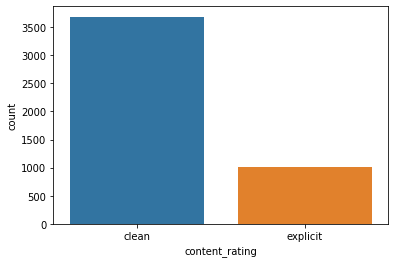

In [89]:
sns.countplot(df.content_rating);

### Ratings by content rating

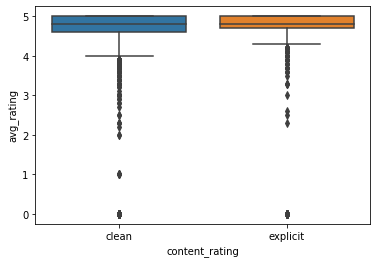

In [90]:
sns.boxplot(x = 'content_rating', y =  'avg_rating', data = df);

In [91]:
#average rating for "clean vs. explicit" podcasts
print('AVERAGE RATINGS:')
print('Average rating clean podcasts: {:.2f}'.format(df.avg_rating[df.content_rating == 'clean'].mean()))
print('Average rating explicit podcasts: {:.2f}'.format(df.avg_rating[df.content_rating == 'explicit'].mean()))
print('')
print('NO. OF STARS')
print('Average no. of stars clean podcasts: {:.2f}'.format(df.total_stars[df.content_rating == 'clean'].mean()))
print('Average no. of stars explicit podcasts: {:.2f}'.format(df.total_stars[df.content_rating == 'explicit'].mean()))


AVERAGE RATINGS:
Average rating clean podcasts: 4.54
Average rating explicit podcasts: 4.63

NO. OF STARS
Average no. of stars clean podcasts: 2028.23
Average no. of stars explicit podcasts: 4553.48


It seems the explicit podcasts are more popular than the clean podcasts on average.

In [92]:
df.head()

podcast_id                                      name   
0  1446936288       The Coach's Wife Chronicles Podcast  \
1  1205327374                                 Not Alone   
2  1450115847  Soaring the sky a glider pilot's Podcast   
3  1404709155                                 Londrelle   
4   394384987                           NHS Couch to 5K   

                                              genres   
0  ['Personal Journals', 'Podcasts', 'Society & C...  \
1  ['History', 'Podcasts', 'Religion & Spirituali...   
2                ['Aviation', 'Podcasts', 'Leisure']   
3    ['Philosophy', 'Podcasts', 'Society & Culture']   
4                   ['Health & Fitness', 'Podcasts']   

                        author   
0  The Coach's Wife Chronicles  \
1                    Not Alone   
2                 Chuck Fulton   
3                    Londrelle   
4                  NHS Choices   

                                         description content_rating   
0  Get an in depth look into life as a Coach's wi...          clean  \
1  Not Alone is a weekly podcast covering all thi...          clean   
2  An Aviation podcast about soaring with sailpla...          clean   
3  A collection of love inspired talks with poet/...          clean   
4  This is a running plan designed to get complet...          clean   

   avg_rating  num_ratings  num_ratings_1star  num_ratings_2star   
0         5.0           34                  0                  0  \
1         4.6          705                 33                 13   
2         4.6           17                  0                  1   
3         5.0          140                  0                  0   
4         4.6          195                  7                  4   

   num_ratings_3star  num_ratings_4star  num_ratings_5star   
0                  0                  0                 34  \
1                 24                 42                593   
2                  1                  1                 14   
3                  1                  1                138   
4                 11                 23                150   

                                       episode_names   
0  ['The Wife Beside You....', 'The Great Divide'...  \
1  ['18: One Hundred Twenty-Six: Dulce Base I - T...   
2  ['A Dream To Soar', 'Auto Tows Aero Tows & Win...   
3  ['What To Do In These Times', 'Choose Happines...   
4  ['Couch to 5K - Week 1', 'Couch to 5K - Week 2...   

                                episode_descriptions   
0  ["Let's get real here and dive into some topic...  \
1  ["This week we're covering one of the most int...   
2  ["Our guest pilot originally from the West Mid...   
3                           ['', '', '', '', '', '']   
4  ['Couch to 5k is a running plan designed to ge...   

                                   episode_durations   
0  [1352000, 849000, 744000, 927000, 2144000, 145...  \
1  [5766000, 4057000, 4638000, 4764000, 3977000, ...   
2  [1844000, 2202000, 2185000, 2818000, 2250000, ...   
3   [250000, 651000, 617000, 792000, 213000, 575000]   
4                                                 []   

                                       episode_dates  num_episodes_sample   
0  ['2020-06-05T00:41:31.000Z', '2019-10-02T00:58...                    6  \
1  ['2020-06-06T00:38:12.000Z', '2020-04-30T22:09...                    6   
2  ['2020-06-03T00:00:00.000Z', '2020-05-26T22:00...                    6   
3  ['2020-03-21T03:03:54.000Z', '2020-03-10T05:55...                    6   
4  ['2012-10-25T19:00:00.000Z', '2012-10-25T18:50...                    6   

                   review_ratings   
0  [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]  \
1  [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]   
2           [5, 5, 5, 3, 5, 5, 5]   
3           [5, 5, 5, 5, 5, 5, 5]   
4  [5, 5, 5, 5, 5, 5, 5, 5, 4, 5]   

                                       review_titles   
0  ['Truth', 'Amen!!!', 'Truth!', 'Relatable, Fun...  \
1  ['Great podcast', 'Hiatus?', 'A Great Find', "...   
2  ['Great Podcast!', 'Interview

## Podcast author

In [93]:
#check for empty strings
df[df.author == '']

Empty DataFrame
Columns: [podcast_id, name, genres, author, description, content_rating, avg_rating, num_ratings, num_ratings_1star, num_ratings_2star, num_ratings_3star, num_ratings_4star, num_ratings_5star, episode_names, episode_descriptions, episode_durations, episode_dates, num_episodes_sample, review_ratings, review_titles, reviews, review_dates, num_reviews_sample, description_lang, name_clean, name_tok, genre_scores, sports_score, news_score, education_score, health_score, lifestyle_score, vehicles_score, business_score, art_score, religion_score, tv_score, comedy_score, science_score, nature_score, kids_score, history_score, games_score, documentary_score, num_genres, sports_genre, news_genre, education_genre, health_genre, lifestyle_genre, vehicles_genre, business_genre, art_genre, religion_genre, tv_genre, comedy_genre, science_genre, nature_genre, kids_genre, history_genre, games_genre, documentary_genre, total_pos_ratings, log_pos_ratings, ratings_cat, ratings_categories, popularity_cat, total_stars, total_stars_sq, popularity_score]
Index: []

In [94]:
#check for duplicates
df.author.duplicated().sum()

462

In [95]:
#get list of duplicate authors
duplicate_authors = df.author[df.author.duplicated()]
duplicate_authors

52                   247Sports
106     Beautiful Game Network
111                  Blue Wire
121             Muslim Central
178                BBC Radio 4
                 ...          
4963        Freakonomics Radio
4977              YEA Networks
4986                  Relay FM
4992                Dear Media
4993       Be Here Now Network
Name: author, Length: 462, dtype: object

In [96]:
#find most common authors
df.author.value_counts().head(20)

author
AfterBuzz TV                  30
The Athletic                  22
BBC Radio 4                   18
SB Nation                     17
PodcastOne                    17
iHeartRadio                   14
TWiT                          13
Swami Guruparananda           10
Blue Wire                      9
Muslim Central                 9
Oxford University              7
PodcastOne / Hubbard Radio     7
Wondery                        7
Fun Kids                       7
Be Here Now Network            6
Bald Move                      6
Barstool Sports                6
Dear Media                     6
Campfire Media                 6
Locked On Podcast Network      6
Name: count, dtype: int64

### Finding authors who are persons

We will try a very basic method to identify some of the authors who are persons (rather than organizations or companies) using named entity recognition.

In [97]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [98]:
def find_persons(text):
    doc = nlp(text)
    label_list = [ent.label_ for ent in doc.ents]
    if 'PERSON' in label_list:
        return 'Person'
    else:
        return 'Not Person'

In [99]:
df['author_type'] = df.author.apply(find_persons)

In [100]:
df['author'][df.author_type == 'Person'][:20]

2                                          Chuck Fulton
8                                         Mike Phillips
11                            LeVar Burton and Stitcher
13                                      Gabriela Masson
14                            Thyroid Lifestyle Support
15                    Mia Birdsong, The Nation Magazine
16                                            Sam Feldt
18                                         Nicole Jakob
20                                         Kono Vidovic
22                                       Chris Moncrief
23                        Jason Newland - FREE Hypnosis
25                                          Tevin McGee
26                                          Chris Stone
32                                       Bobby Mitchell
35                                        Yorkshire CCC
37                       Matthew Blake / Karyn Thurston
38                                          Scott Wells
39                                       Nadia T

We can see that this method works pretty well, although it is not perfect.

In [101]:
df.author_type.value_counts()

author_type
Not Person    2618
Person        2077
Name: count, dtype: int64

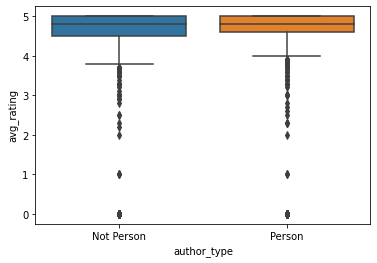

In [102]:
#distribution of average ratings for podcasts where the author is a person vs. not a person
sns.boxplot(x = 'author_type', y =  'avg_rating', data = df);

In [103]:
#average rating for "person vs. non-person" authored podcasts
print('AVERAGE RATINGS:')
print('Average rating person-author podcasts: {:.2f}'.format(df.avg_rating[df.author_type == 'Person'].mean()))
print('Average rating non-person-author podcasts: {:.2f}'.format(df.avg_rating[df.author_type == 'Not Person'].mean()))
print('')
print('NO. OF STARS')
print('Average no. of stars person-author podcasts: {:.2f}'.format(df.total_stars[df.author_type == 'Person'].mean()))
print('Average no. of stars non-person-author podcasts: {:.2f}'.format(df.total_stars[df.author_type == 'Not Person'].mean()))


AVERAGE RATINGS:
Average rating person-author podcasts: 4.56
Average rating non-person-author podcasts: 4.56

NO. OF STARS
Average no. of stars person-author podcasts: 1805.98
Average no. of stars non-person-author podcasts: 3180.71


### Gender of authors

In [104]:
import gender_guesser.detector as gender
d = gender.Detector()

def get_author_gender (author):
    #for simplicity, we will take the first word in the "author" string to guess the gender from.
    author_words = author.split(' ')
    first_name = author_words[0]
    return d.get_gender(first_name)

In [105]:
#apply our function
df['author_gender'] = df['author'].apply(get_author_gender)
#remove the ones where author is not a person
df['author_gender'].where(df.author_type != 'Not Person', 'NA', inplace=True)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'NA'),
  Text(1, 0, 'male'),
  Text(2, 0, 'unknown'),
  Text(3, 0, 'female'),
  Text(4, 0, 'mostly_male'),
  Text(5, 0, 'mostly_female'),
  Text(6, 0, 'andy')])

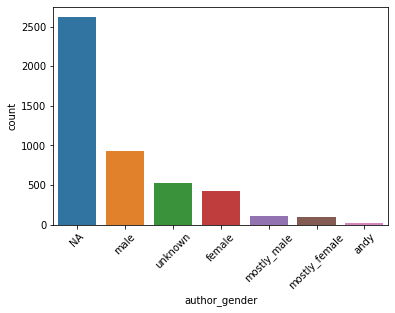

In [106]:
#explore the authors by gender
sns.countplot(df.author_gender);
plt.xticks(rotation = 45)

In [107]:
df.head()

podcast_id                                      name   
0  1446936288       The Coach's Wife Chronicles Podcast  \
1  1205327374                                 Not Alone   
2  1450115847  Soaring the sky a glider pilot's Podcast   
3  1404709155                                 Londrelle   
4   394384987                           NHS Couch to 5K   

                                              genres   
0  ['Personal Journals', 'Podcasts', 'Society & C...  \
1  ['History', 'Podcasts', 'Religion & Spirituali...   
2                ['Aviation', 'Podcasts', 'Leisure']   
3    ['Philosophy', 'Podcasts', 'Society & Culture']   
4                   ['Health & Fitness', 'Podcasts']   

                        author   
0  The Coach's Wife Chronicles  \
1                    Not Alone   
2                 Chuck Fulton   
3                    Londrelle   
4                  NHS Choices   

                                         description content_rating   
0  Get an in depth look into life as a Coach's wi...          clean  \
1  Not Alone is a weekly podcast covering all thi...          clean   
2  An Aviation podcast about soaring with sailpla...          clean   
3  A collection of love inspired talks with poet/...          clean   
4  This is a running plan designed to get complet...          clean   

   avg_rating  num_ratings  num_ratings_1star  num_ratings_2star   
0         5.0           34                  0                  0  \
1         4.6          705                 33                 13   
2         4.6           17                  0                  1   
3         5.0          140                  0                  0   
4         4.6          195                  7                  4   

   num_ratings_3star  num_ratings_4star  num_ratings_5star   
0                  0                  0                 34  \
1                 24                 42                593   
2                  1                  1                 14   
3                  1                  1                138   
4                 11                 23                150   

                                       episode_names   
0  ['The Wife Beside You....', 'The Great Divide'...  \
1  ['18: One Hundred Twenty-Six: Dulce Base I - T...   
2  ['A Dream To Soar', 'Auto Tows Aero Tows & Win...   
3  ['What To Do In These Times', 'Choose Happines...   
4  ['Couch to 5K - Week 1', 'Couch to 5K - Week 2...   

                                episode_descriptions   
0  ["Let's get real here and dive into some topic...  \
1  ["This week we're covering one of the most int...   
2  ["Our guest pilot originally from the West Mid...   
3                           ['', '', '', '', '', '']   
4  ['Couch to 5k is a running plan designed to ge...   

                                   episode_durations   
0  [1352000, 849000, 744000, 927000, 2144000, 145...  \
1  [5766000, 4057000, 4638000, 4764000, 3977000, ...   
2  [1844000, 2202000, 2185000, 2818000, 2250000, ...   
3   [250000, 651000, 617000, 792000, 213000, 575000]   
4                                                 []   

                                       episode_dates  num_episodes_sample   
0  ['2020-06-05T00:41:31.000Z', '2019-10-02T00:58...                    6  \
1  ['2020-06-06T00:38:12.000Z', '2020-04-30T22:09...                    6   
2  ['2020-06-03T00:00:00.000Z', '2020-05-26T22:00...                    6   
3  ['2020-03-21T03:03:54.000Z', '2020-03-10T05:55...                    6   
4  ['2012-10-25T19:00:00.000Z', '2012-10-25T18:50...                    6   

                   review_ratings   
0  [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]  \
1  [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]   
2           [5, 5, 5, 3, 5, 5, 5]   
3           [5, 5, 5, 5, 5, 5, 5]   
4  [5, 5, 5, 5, 5, 5, 5, 5, 4, 5]   

                                       review_titles   
0  ['Truth', 'Amen!!!', 'Truth!', 'Relatable, Fun...  \
1  ['Great podcast', 'Hiatus?', 'A Great Find', "...   
2  ['Great Podcast!', 'Interview

## Number of episodes in sample

This is the number of episodes for which we scraped information in our sample.

In [108]:
df.num_episodes_sample.value_counts()

num_episodes_sample
6    4269
4      94
3      87
2      84
5      82
1      79
Name: count, dtype: int64

## Episode durations

In [109]:
#function to get average episode duration
import ast

def get_avg_duration(ep_durations):
    #convert str to list
    ep_durations_lst = ast.literal_eval(ep_durations)
    try:
        avg_duration = sum(ep_durations_lst) / len(ep_durations_lst)
        return avg_duration
    except:
        return np.nan

In [110]:
df['avg_episode_duration'] = df.episode_durations.apply(get_avg_duration)

In [111]:
df['avg_episode_duration'].isna().sum()

126

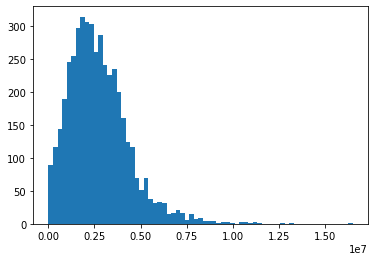

In [112]:
plt.hist(df.avg_episode_duration, bins = 'auto');

In [113]:
#replace missing values with mean
df['avg_episode_duration'].fillna(df.avg_episode_duration.mean(), inplace=True)

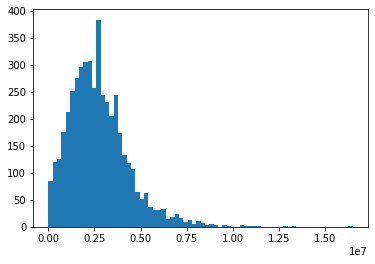

In [114]:
#print the new histogram
plt.hist(df.avg_episode_duration, bins = 'auto');

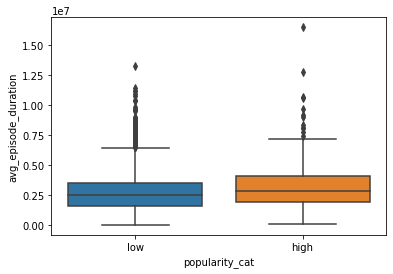

In [115]:
sns.boxplot(x = df.popularity_cat, y = df.avg_episode_duration);

In [116]:
#difference in average episode duration for high and low popularity podcasts
df['avg_episode_duration'].groupby(df['popularity_cat']).mean()

popularity_cat
high    3.176013e+06
low     2.687664e+06
Name: avg_episode_duration, dtype: float64

## Podcast description

In [117]:
#clean descriptions
df['description_clean'] = df['description'].apply(lambda x: clean_names(x))

In [118]:
#tokenize descriptions
stop_words.extend(['episode', '', 'u', 'get', 'one', 'new'])

df['description_tok'] = df['description_clean'].apply(lambda x: tokenize_names(x))

In [119]:
#get list of all words in descriptions to see most common words
all_words_description = df['description_tok'].sum()
counted_words_description = collections.Counter(all_words_description)
counted_words_description.most_common(50)

[('life', 1045),
 ('story', 888),
 ('world', 849),
 ('u', 654),
 ('every', 623),
 ('interview', 592),
 ('join', 550),
 ('people', 540),
 ('week', 507),
 ('help', 500),
 ('host', 490),
 ('topic', 481),
 ('guest', 462),
 ('news', 455),
 ('take', 453),
 ('time', 444),
 ('hosted', 444),
 ('business', 432),
 ('best', 426),
 ('share', 415),
 ('thing', 410),
 ('love', 401),
 ('like', 399),
 ('weekly', 398),
 ('discus', 396),
 ('make', 395),
 ('conversation', 394),
 ('well', 390),
 ('learn', 375),
 ('expert', 367),
 ('year', 363),
 ('way', 360),
 ('industry', 326),
 ('work', 313),
 ('game', 308),
 ('also', 307),
 ('day', 305),
 ('want', 303),
 ('find', 299),
 ('episode', 291),
 ('know', 290),
 ('real', 289),
 ('live', 289),
 ('question', 286),
 ('experience', 286),
 ('sport', 282),
 ('music', 280),
 ('information', 280),
 ('woman', 279),
 ('latest', 277)]

## Episode names

In [120]:
#clean episode names
df['ep_names_clean'] = df['episode_names'].apply(clean_names)

In [121]:
#tokenize episode names
stop_words.extend(['ep', 'part', 'e', 'season', 'w', 'se', 'v'])
df['ep_names_tok'] = df['ep_names_clean'].apply(tokenize_names)

In [122]:
#get list of all words in episode names to see most common words
all_words_ep_names = df['ep_names_tok'].sum()
counted_words_ep_names = collections.Counter(all_words_ep_names)
counted_words_ep_names.most_common(50)

[('covid', 509),
 ('dr', 451),
 ('life', 450),
 ('time', 386),
 ('interview', 377),
 ('day', 325),
 ('story', 317),
 ('june', 303),
 ('world', 264),
 ('special', 263),
 ('pandemic', 260),
 ('bonus', 256),
 ('back', 252),
 ('coronavirus', 246),
 ('review', 242),
 ('best', 234),
 ('black', 234),
 ('live', 233),
 ('chapter', 233),
 ('may', 230),
 ('u', 229),
 ('v', 225),
 ('game', 215),
 ('love', 200),
 ('home', 192),
 ('health', 191),
 ('draft', 186),
 ('thing', 182),
 ('conversation', 180),
 ('make', 179),
 ('ft', 179),
 ('way', 169),
 ('big', 169),
 ('recap', 168),
 ('business', 167),
 ('quarantine', 165),
 ('change', 164),
 ('week', 163),
 ('good', 160),
 ('future', 160),
 ('hour', 160),
 ('work', 159),
 ('year', 158),
 ('john', 157),
 ('power', 157),
 ('history', 157),
 ('question', 156),
 ('tip', 155),
 ('guest', 154),
 ('news', 150)]

## Episode descriptions

In [123]:
#clean episode descriptions
df['ep_descriptions_clean'] = df['episode_descriptions'].apply(clean_names)

In [124]:
#tokenize episode descriptions
df['ep_descriptions_tok'] = df['ep_descriptions_clean'].apply(tokenize_names)

In [125]:
#get list of all words in episode descriptions to see most common words
all_words_ep_descriptions = df['ep_descriptions_tok'].sum()
counted_words_ep_descriptions = collections.Counter(all_words_ep_descriptions)
counted_words_ep_descriptions.most_common(50)

[('u', 8973),
 ('week', 4808),
 ('discus', 4781),
 ('time', 4758),
 ('n', 4370),
 ('also', 4307),
 ('like', 3996),
 ('make', 3866),
 ('life', 3782),
 ('way', 3601),
 ('first', 3290),
 ('today', 3176),
 ('year', 3159),
 ('story', 3072),
 ('find', 2990),
 ('xan', 2964),
 ('help', 2935),
 ('join', 2934),
 ('world', 2882),
 ('people', 2777),
 ('go', 2728),
 ('share', 2723),
 ('back', 2660),
 ('work', 2627),
 ('well', 2521),
 ('book', 2499),
 ('take', 2473),
 ('day', 2425),
 ('question', 2418),
 ('thing', 2370),
 ('visit', 2345),
 ('want', 2275),
 ('xa', 2267),
 ('know', 2185),
 ('free', 2158),
 ('love', 2066),
 ('learn', 2058),
 ('twitter', 2015),
 ('much', 2001),
 ('two', 1887),
 ('support', 1885),
 ('need', 1878),
 ('dr', 1866),
 ('music', 1854),
 ('business', 1849),
 ('instagram', 1819),
 ('many', 1793),
 ('look', 1792),
 ('review', 1763),
 ('follow', 1760)]

In [126]:
df.head()

podcast_id                                      name   
0  1446936288       The Coach's Wife Chronicles Podcast  \
1  1205327374                                 Not Alone   
2  1450115847  Soaring the sky a glider pilot's Podcast   
3  1404709155                                 Londrelle   
4   394384987                           NHS Couch to 5K   

                                              genres   
0  ['Personal Journals', 'Podcasts', 'Society & C...  \
1  ['History', 'Podcasts', 'Religion & Spirituali...   
2                ['Aviation', 'Podcasts', 'Leisure']   
3    ['Philosophy', 'Podcasts', 'Society & Culture']   
4                   ['Health & Fitness', 'Podcasts']   

                        author   
0  The Coach's Wife Chronicles  \
1                    Not Alone   
2                 Chuck Fulton   
3                    Londrelle   
4                  NHS Choices   

                                         description content_rating   
0  Get an in depth look into life as a Coach's wi...          clean  \
1  Not Alone is a weekly podcast covering all thi...          clean   
2  An Aviation podcast about soaring with sailpla...          clean   
3  A collection of love inspired talks with poet/...          clean   
4  This is a running plan designed to get complet...          clean   

   avg_rating  num_ratings  num_ratings_1star  num_ratings_2star   
0         5.0           34                  0                  0  \
1         4.6          705                 33                 13   
2         4.6           17                  0                  1   
3         5.0          140                  0                  0   
4         4.6          195                  7                  4   

   num_ratings_3star  num_ratings_4star  num_ratings_5star   
0                  0                  0                 34  \
1                 24                 42                593   
2                  1                  1                 14   
3                  1                  1                138   
4                 11                 23                150   

                                       episode_names   
0  ['The Wife Beside You....', 'The Great Divide'...  \
1  ['18: One Hundred Twenty-Six: Dulce Base I - T...   
2  ['A Dream To Soar', 'Auto Tows Aero Tows & Win...   
3  ['What To Do In These Times', 'Choose Happines...   
4  ['Couch to 5K - Week 1', 'Couch to 5K - Week 2...   

                                episode_descriptions   
0  ["Let's get real here and dive into some topic...  \
1  ["This week we're covering one of the most int...   
2  ["Our guest pilot originally from the West Mid...   
3                           ['', '', '', '', '', '']   
4  ['Couch to 5k is a running plan designed to ge...   

                                   episode_durations   
0  [1352000, 849000, 744000, 927000, 2144000, 145...  \
1  [5766000, 4057000, 4638000, 4764000, 3977000, ...   
2  [1844000, 2202000, 2185000, 2818000, 2250000, ...   
3   [250000, 651000, 617000, 792000, 213000, 575000]   
4                                                 []   

                                       episode_dates  num_episodes_sample   
0  ['2020-06-05T00:41:31.000Z', '2019-10-02T00:58...                    6  \
1  ['2020-06-06T00:38:12.000Z', '2020-04-30T22:09...                    6   
2  ['2020-06-03T00:00:00.000Z', '2020-05-26T22:00...                    6   
3  ['2020-03-21T03:03:54.000Z', '2020-03-10T05:55...                    6   
4  ['2012-10-25T19:00:00.000Z', '2012-10-25T18:50...                    6   

                   review_ratings   
0  [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]  \
1  [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]   
2           [5, 5, 5, 3, 5, 5, 5]   
3           [5, 5, 5, 5, 5, 5, 5]   
4  [5, 5, 5, 5, 5, 5, 5, 5, 4, 5]   

                                       review_titles   
0  ['Truth', 'Amen!!!', 'Truth!', 'Relatable, Fun...  \
1  ['Great podcast', 'Hiatus?', 'A Great Find', "...   
2  ['Great Podcast!', 'Interview

## All tokens

In [132]:
df.to_csv('df_processed.csv', index=False) ##Create csv with all the work done until now

In [133]:
df = pd.read_csv('df_processed.csv') ## Rescue the CSV

In [134]:
df.head()

podcast_id                                      name   
0  1446936288       The Coach's Wife Chronicles Podcast  \
1  1205327374                                 Not Alone   
2  1450115847  Soaring the sky a glider pilot's Podcast   
3  1404709155                                 Londrelle   
4   394384987                           NHS Couch to 5K   

                                              genres   
0  ['Personal Journals', 'Podcasts', 'Society & C...  \
1  ['History', 'Podcasts', 'Religion & Spirituali...   
2                ['Aviation', 'Podcasts', 'Leisure']   
3    ['Philosophy', 'Podcasts', 'Society & Culture']   
4                   ['Health & Fitness', 'Podcasts']   

                        author   
0  The Coach's Wife Chronicles  \
1                    Not Alone   
2                 Chuck Fulton   
3                    Londrelle   
4                  NHS Choices   

                                         description content_rating   
0  Get an in depth look into life as a Coach's wi...          clean  \
1  Not Alone is a weekly podcast covering all thi...          clean   
2  An Aviation podcast about soaring with sailpla...          clean   
3  A collection of love inspired talks with poet/...          clean   
4  This is a running plan designed to get complet...          clean   

   avg_rating  num_ratings  num_ratings_1star  num_ratings_2star   
0         5.0           34                  0                  0  \
1         4.6          705                 33                 13   
2         4.6           17                  0                  1   
3         5.0          140                  0                  0   
4         4.6          195                  7                  4   

   num_ratings_3star  num_ratings_4star  num_ratings_5star   
0                  0                  0                 34  \
1                 24                 42                593   
2                  1                  1                 14   
3                  1                  1                138   
4                 11                 23                150   

                                       episode_names   
0  ['The Wife Beside You....', 'The Great Divide'...  \
1  ['18: One Hundred Twenty-Six: Dulce Base I - T...   
2  ['A Dream To Soar', 'Auto Tows Aero Tows & Win...   
3  ['What To Do In These Times', 'Choose Happines...   
4  ['Couch to 5K - Week 1', 'Couch to 5K - Week 2...   

                                episode_descriptions   
0  ["Let's get real here and dive into some topic...  \
1  ["This week we're covering one of the most int...   
2  ["Our guest pilot originally from the West Mid...   
3                           ['', '', '', '', '', '']   
4  ['Couch to 5k is a running plan designed to ge...   

                                   episode_durations   
0  [1352000, 849000, 744000, 927000, 2144000, 145...  \
1  [5766000, 4057000, 4638000, 4764000, 3977000, ...   
2  [1844000, 2202000, 2185000, 2818000, 2250000, ...   
3   [250000, 651000, 617000, 792000, 213000, 575000]   
4                                                 []   

                                       episode_dates  num_episodes_sample   
0  ['2020-06-05T00:41:31.000Z', '2019-10-02T00:58...                    6  \
1  ['2020-06-06T00:38:12.000Z', '2020-04-30T22:09...                    6   
2  ['2020-06-03T00:00:00.000Z', '2020-05-26T22:00...                    6   
3  ['2020-03-21T03:03:54.000Z', '2020-03-10T05:55...                    6   
4  ['2012-10-25T19:00:00.000Z', '2012-10-25T18:50...                    6   

                   review_ratings   
0  [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]  \
1  [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]   
2           [5, 5, 5, 3, 5, 5, 5]   
3           [5, 5, 5, 5, 5, 5, 5]   
4  [5, 5, 5, 5, 5, 5, 5, 5, 4, 5]   

                                       review_titles   
0  ['Truth', 'Amen!!!', 'Truth!', 'Relatable, Fun...  \
1  ['Great podcast', 'Hiatus?', 'A Great Find', "...   
2  ['Great Podcast!', 'Interview

In [130]:
# If tokenization does not work, use this:
#df['name_tok'] =df['name_tok'].apply(lambda x: x[1:-1])
#df['description_tok'] =df['description_tok'].apply(lambda x: x[1:-1])
#df['ep_names_tok'] =df['ep_names_tok'].apply(lambda x: x[1:-1])
#df['ep_descriptions_tok'] = df['ep_descriptions_tok'].apply(lambda x: x[1:-1])

In [135]:
#create a feature which combines all the tokenized lists for name, description, episode name and episode description
df['all_tokens'] = df.name_tok.apply(ast.literal_eval) + df.description_tok.apply(ast.literal_eval) + df.ep_names_tok.apply(ast.literal_eval) + df.ep_descriptions_tok.apply(ast.literal_eval)

## All text

In [136]:
#create a feature which joins the final tokens to obtain the final text to use in the analysis
def get_final_text(tokens):
    final_text = " ".join([word for word in tokens])
    return final_text

df['all_text'] = df.all_tokens.apply(get_final_text)

# Model 1

Predict the number of positive ratings of a podcast using all the info we currently have.

In [137]:
model1_target = 'total_pos_ratings'
model1_features = ['content_rating', 'sports_genre', 'news_genre', 'education_genre', 'health_genre', 'lifestyle_genre', 'vehicles_genre', 'business_genre', 'art_genre', 'religion_genre', 'tv_genre', 'comedy_genre',
         'science_genre', 'nature_genre', 'kids_genre', 'history_genre', 'games_genre', 'documentary_genre', 'author_type', 'author_gender',
                   'avg_episode_duration']

In [138]:
#drop nulls before starting
print('before: ', df.shape)

before:  (4695, 81)


In [139]:
df.dropna(inplace = True)
print ('after: ', df.shape)

after:  (2074, 81)


In [140]:
#set X and y
y = df[model1_target]
X = df[model1_features]

In [141]:
#get dummies of categorical features
X = pd.get_dummies(X, columns = ['content_rating', 'author_type', 'author_gender'], drop_first=True)

In [142]:
#scale average episode duration
from sklearn.preprocessing import minmax_scale
X['avg_episode_duration'] = minmax_scale(X['avg_episode_duration'])

In [143]:
#take log of the target
y_log = np.log(y+1)

In [144]:
#split the data to train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size = 0.25, random_state = 42)

In [145]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1555, 24)
(519, 24)
(1555,)
(519,)


In [146]:
from sklearn.linear_model import LinearRegression
multivar_model = LinearRegression().fit(X_train, y_train)

In [147]:
# print the intercept and coef
print('Intercept: {}'.format(multivar_model.intercept_))
print('Coefficients: {}'. format(multivar_model.coef_))

Intercept: 2.800770651429139
Coefficients: [-0.50933321 -0.09280405  0.42755147  0.56275863 -0.01281124 -0.69587121
  0.48314114 -0.27327168 -0.05319003 -0.37026169 -0.03300819 -0.68525054
 -0.61944811 -0.3402283   0.7431518  -0.27054005  1.04829369  3.4311815
  0.19133826  0.43283685  0.39262261  0.72324718  0.34549371  0.54806143]


In [148]:
# Print the predictions
y_pred = multivar_model.predict(X_test)
print(y_pred)
print(y_pred.shape)

[3.46817326 2.91630198 4.40542497 4.27643763 3.74644735 5.0999527
 3.18506812 4.64968686 4.2608857  3.11955142 3.10173601 4.01471123
 3.42985628 3.66710372 4.42098289 3.49312493 3.43671162 3.791388
 2.92176155 4.22998799 4.30572205 3.34716225 3.58925334 4.94225736
 4.04126476 3.70345946 3.09781218 3.51677759 4.3966256  4.19784075
 3.33486834 3.58866949 4.67734646 4.04561614 5.42320668 3.11531722
 4.52437252 3.31944605 3.35464256 3.35592542 3.69492913 3.46636348
 3.7468051  3.28757053 4.75913499 4.19412441 4.67051942 3.13294378
 3.55715413 5.32978495 5.29365106 4.02577068 3.79560769 4.72414209
 5.2561921  5.5488453  3.51850682 4.46796962 3.17969054 5.87999742
 4.82805662 2.57533004 4.4786003  4.34831439 3.83676286 4.08018385
 3.17517234 4.50545956 4.19288127 4.99415807 4.78999017 3.80659125
 3.1385508  4.306632   3.48713494 4.33202935 3.12149077 3.08821307
 4.17260335 4.1973388  4.29266038 3.61196902 4.39385038 3.64740649
 2.9808305  4.35712519 4.64883008 3.56339924 2.97079317 2.5473100

In [149]:
# Calculate and print the following error measures: MAE, MSE, RMSE and R2
MAE_multi_test = metrics.mean_absolute_error(y_test, y_pred)
MSE_multi_test = metrics.mean_squared_error(y_test, y_pred)
RMSE_multi_test = np.sqrt(MSE_multi_test)
R2_multi_test = metrics.r2_score(y_test, y_pred)

print('MAE Test: {}'.format(MAE_multi_test))
print('MSE Test: {}'.format(MSE_multi_test))
print('RMSE Test: {}'.format(RMSE_multi_test))
print('R2 Score Test: {}'.format(R2_multi_test))

MAE Test: 1.5440980602037453
MSE Test: 3.4596483663510993
RMSE Test: 1.860013001661843
R2 Score Test: 0.09003713790778534


In [150]:
### check overfitting
#Predictions associated to X_train
y_pred_train = multivar_model.predict(X_train)

MAE_multi_train = metrics.mean_absolute_error(y_train, y_pred_train)
MSE_multi_train = metrics.mean_squared_error(y_train, y_pred_train)
RMSE_multi_train = np.sqrt(MSE_multi_train)
R2_multi_train = metrics.r2_score(y_train, y_pred_train)

print('MAE Train: {}'.format(MAE_multi_train))
print('MSE Train: {}'.format(MSE_multi_train))
print('RMSE Train: {}'.format(RMSE_multi_train))
print('R2 Score Train: {}'.format(R2_multi_train))


MAE Train: 1.590970300237142
MSE Train: 3.840095413884809
RMSE Train: 1.9596161394224147
R2 Score Train: 0.09413580393908572
